<a href="https://colab.research.google.com/github/centeno/covid-impact-scrapper/blob/master/step04_eda__multivocal_cat%26dim_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
# Install

#!apt-get update # to update ubuntu to correctly run apt install

# get domains
# https://pypi.org/project/tld/
#!pip install tld

# geocod
#!pip install geopy

# dataviz
#!pip install --upgrade plotly
#!pip install jupyter-dash
#!pip install raceplotly

#!pip install "gensim==3.8.1"
#!pip install nltk
#!pip install texthero
#!pip install pycaret

#bert
#!pip install transformers
#!pip install bert-extractive-summarizer

#Ktrain
#!pip install numpy>=1.20.0
#!pip install tensorflow
#!pip3 install ktrain

#packages
#!python -m spacy download en_core_web_sm
#!python -m spacy download pt_core_web_sm
#!python -m textblob.download_corpora

# spacy
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en
#!python -m spacy download pt
#!python -m spacy download en_core_web_sm

# Country converter
#! pip install country_converter --upgrade

# Contextual spell correction with spacy and bert
#!pip install contextualSpellCheck


# Sentiment analysis
#!pip install text2emotion

#Python library for interactive topic model visualization
#!pip install pyLDAvis


# IMPORT

In [ ]:
# Manipulação e visualização de dados
import os
import re
import sys
import glob
import socket
import urllib
import datetime
import numpy as np
import pandas as pd
from time import sleep
#import bamboolib as bam


#dataviz
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

# Com o NLTK fazemos Processamento de Linguagem Natural
import nltk
import spacy
import string


# get domain
import tld
from tld import get_tld, get_fld


# PLN
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
import string
import texthero as hero
from texthero import preprocessing
import ktrain
from ktrain import text


# Definimos o parâmetro abaixo para evitar o erro:
# RecursionError: maximum recursion depth exceeded
# Ao gravar os resultados em disco
sys.setrecursionlimit(50000)

%matplotlib inline


#https://discuss.analyticsvidhya.com/t/how-to-display-full-dataframe-in-pandas/23298/3
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Vamos desativar isso.
import sys
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# INPUT

In [ ]:
path = "/home/eluis/workspace/covid19impact/data/03_multivocal/"

In [ ]:
# input grey dataframe
df = pd.read_csv(path+'step03_pnl_multivocal_v1.csv', sep='|', parse_dates=["date"], engine="python", encoding='UTF-8')

In [ ]:
print(df.shape);
df.head(2)

(1130, 104)


Unnamed: 0  level_0  index type_study       date  year  month  \
0           0        0      0       grey 2019-11-26  2019     11   
1           1        1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'cares', 'ratings', 'rati...   
1  ['ways', 'technology', 'helping', 'fight', 'co...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0  

# PADRONIZAÇÃO DAS CATEGORIAS

In [ ]:
# list of unique categories
df.rq3.unique()

array(['transformação digital',
       'inteligência artificial cibersegurança rastreamento analytics',
       'relatório anual financeiro trabalho remoto produtividade automação',
       'trabalho remoto', 'essencialidade',
       'trabalho remoto colaboração comunicação produtividade',
       'cadeia de suprimentos',
       'transformação digital cibersegurança pme',
       'trabalho remoto colaboração',
       'trabalho remoto produtividade interrupções nos negócios resiliência inovação recrutamento',
       'trabalho remoto fabricação de hardware',
       'transformação digital Plano de Continuidade de Negócios e Recuperação de Desastres (BCDR)',
       'trabalho remoto continuidade dos negócios cloud Regulamento Geral sobre a Proteção de Dados Rede privada virtual comunicação ',
       'Plano de Continuidade de Negócios e Recuperação de Desastres (BCDR) ',
       'produtividade produtividade cloud comunicação colaboração método ágil flexibilidade resiliência',
       'transformaçã

In [ ]:
df['Unnamed: 0'] = df.index

In [ ]:
print(df.shape);
df.head(2)

(1130, 104)


Unnamed: 0  level_0  index type_study       date  year  month  \
0           0        0      0       grey 2019-11-26  2019     11   
1           1        1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'cares', 'ratings', 'rati...   
1  ['ways', 'technology', 'helping', 'fight', 'co...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0  

In [ ]:
df.index.max()

1129

# SPLIT CATEGORIES (TAGS) IN "ALLTAGS" COLUMN

In [ ]:
# replace
df["all_tags"] = df["all_tags"].replace('3dinternet das coisas','3d;internet das coisas', regex=True)

In [ ]:
df["all_tags"] = df["all_tags"].replace(',', ';', regex=True)

In [ ]:
# split

In [ ]:
df_cat = df["all_tags"].str.split(pat=";", expand=True)

In [ ]:
df_cat.columns = [str(column) for column in df_cat.columns]
df_cat.head()

0               1                2              3  \
0    transformação digital            None             None           None   
1  inteligência artificial  cibersegurança     rastreamento      analytics   
2          relatório anual      financeiro  trabalho remoto  produtividade   
3          trabalho remoto            None             None           None   
4           essencialidade            None             None           None   

           4     5     6     7     8     9    10    11    12    13    14  \
0       None  None  None  None  None  None  None  None  None  None  None   
1       None  None  None  None  None  None  None  None  None  None  None   
2  automação  None  None  None  None  None  None  None  None  None  None   
3       None  None  None  None  None  None  None  None  None  None  None   
4       None  None  None  None  None  None  None  None  None  None  None   

     15    16    17    18    19    20    21    22    23    24    25    26  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1  None  None  None  None  None  None  None  None  None  None  None  None   
2  None  None  None  None  None  None  None  None  None  None  None  None   
3  None  None  None  None  None  None  None  None  None  None  None  None   
4  None  None  None  None  None  None  None  None  None  None  None  None   

     27    28    29    30    31  
0  None  None  None  None  None  
1  None  None  None  None  None  
2  None  None  None  None  None  
3  None  None  None  None  None  
4  None  None  None  None  None

In [ ]:
df_cat.columns = ['alltags','tst1', 'tst2', 'tst3', 'tst4', 'tst5', 'tst6', 'tst7', 'tst8', 'tst9', 'tst10',
                  'tst11', 'tst12', 'tst13', 'tst14', 'tst15', 'tst16', 'tst17', 'tst18', 'tst19', 'tst20',
                  'tst21', 'tst22', 'tst23', 'tst24', 'tst25', 'tst26', 'tst27', 'tst28', 'tst29', 'tst30','tst31']

In [ ]:
df_cat

alltags                     tst1  \
0         transformação digital                     None   
1       inteligência artificial           cibersegurança   
2               relatório anual               financeiro   
3               trabalho remoto                     None   
4                essencialidade                     None   
...                         ...                      ...   
1125             cibersegurança  inteligência artificial   
1126  internet das coisas (IOT)                 wearable   
1127            trabalho remoto            produtividade   
1128              ensino remoto  inteligência artificial   
1129                 fabricação      desenvolvimento web   

                        tst2           tst3                         tst4  \
0                       None           None                         None   
1               rastreamento      analytics                         None   
2            trabalho remoto  produtividade                    automação   
3                       None           None                         None   
4                       None           None                         None   
...                      ...            ...                          ...   
1125               automação       robótica        reconhecimento facial   
1126                   drone       robótica       desenvolvimento mobile   
1127             comunicação    colaboração  desenvolvimento distribuido   
1128                    None           None                         None   
1129  desenvolvimento mobile            IOT                     robótica   

                         tst5                                    tst6  \
0                        None                                    None   
1                        None                                    None   
2                        None                                    None   
3                        None                                    None   
4                        None                                    None   
...                       ...                                     ...   
1125   desenvolvimento mobile  regulamento geral de proteção de dados   
1126           cibersegurança  regulamento geral de proteção de dados   
1127                     None                                    None   
1128                     None                                    None   
1129  inteligência artificial                                big data   

             tst7                            tst8               tst9  \
0            None                            None               None   
1            None                            None               None   
2            None                            None               None   
3            None                            None               None   
4            None                            None               None   
...           ...                             ...                ...   
1125         None                            None               None   
1126         None                            None               None   
1127         None                            None               None   
1128         None                            None               None   
1129  blockchains  reconhecimento facial e de voz  análise cognitiva   

             tst10     tst11 tst12 tst13 tst14 tst15 tst16 tst17 tst18 tst19  \
0             None      None  None  None  None  None  None  None  None  None   
1             None      None  None  None  None  None  None  None  None  None   
2             None      None  None  None  None  None  None  None  None  None   
3             None      None  None  None  None  None  None  None  None  None   
4             None      None  None  None  None  None  None  None  None  None   
...            ...       ...   ...   ...   ...   ...   ...   ...   ...   ...   
1125          None      None  None  None  None  None  None  None  None  None   
1126    

In [ ]:
# get index for posterior merge
df_cat.reset_index()

index                    alltags                     tst1  \
0         0      transformação digital                     None   
1         1    inteligência artificial           cibersegurança   
2         2            relatório anual               financeiro   
3         3            trabalho remoto                     None   
4         4             essencialidade                     None   
...     ...                        ...                      ...   
1125   1125             cibersegurança  inteligência artificial   
1126   1126  internet das coisas (IOT)                 wearable   
1127   1127            trabalho remoto            produtividade   
1128   1128              ensino remoto  inteligência artificial   
1129   1129                 fabricação      desenvolvimento web   

                        tst2           tst3                         tst4  \
0                       None           None                         None   
1               rastreamento      analytics                         None   
2            trabalho remoto  produtividade                    automação   
3                       None           None                         None   
4                       None           None                         None   
...                      ...            ...                          ...   
1125               automação       robótica        reconhecimento facial   
1126                   drone       robótica       desenvolvimento mobile   
1127             comunicação    colaboração  desenvolvimento distribuido   
1128                    None           None                         None   
1129  desenvolvimento mobile            IOT                     robótica   

                         tst5                                    tst6  \
0                        None                                    None   
1                        None                                    None   
2                        None                                    None   
3                        None                                    None   
4                        None                                    None   
...                       ...                                     ...   
1125   desenvolvimento mobile  regulamento geral de proteção de dados   
1126           cibersegurança  regulamento geral de proteção de dados   
1127                     None                                    None   
1128                     None                                    None   
1129  inteligência artificial                                big data   

             tst7                            tst8               tst9  \
0            None                            None               None   
1            None                            None               None   
2            None                            None               None   
3            None                            None               None   
4            None                            None               None   
...           ...                             ...                ...   
1125         None                            None               None   
1126         None                            None               None   
1127         None                            None               None   
1128         None                            None               None   
1129  blockchains  reconhecimento facial e de voz  análise cognitiva   

             tst10     tst11 tst12 tst13 tst14 tst15 tst16 tst17 tst18 tst19  \
0             None      None  None  None  None  None  None  None  None  None   
1             None      None  None  None  None  None  None  None  None  None   
2             None      None  None  None  None  None  None  None  None  None   
3             None      None  None  None  None  None  None  None  None  None   
4             None      None  None  None  None  None  None  None  None  None   
...            ...       ...   ...   ...   ...   ...   ...   ...  

In [ ]:
# list nulls
df_cat.isnull().any()

alltags    False
tst1        True
tst2        True
tst3        True
tst4        True
tst5        True
tst6        True
tst7        True
tst8        True
tst9        True
tst10       True
tst11       True
tst12       True
tst13       True
tst14       True
tst15       True
tst16       True
tst17       True
tst18       True
tst19       True
tst20       True
tst21       True
tst22       True
tst23       True
tst24       True
tst25       True
tst26       True
tst27       True
tst28       True
tst29       True
tst30       True
tst31       True
dtype: bool

In [ ]:
# get index for merge
df_cat['Unnamed: 0'] = df_cat.index

In [ ]:
df_cat['Unnamed: 0'].max()

1129

In [ ]:
df.index.max()

1129

In [ ]:
# create melt dataset
df_cat2 = df_cat.melt(id_vars=['Unnamed: 0'])

In [ ]:
# print
df_cat2

Unnamed: 0 variable                    value
0               0  alltags    transformação digital
1               1  alltags  inteligência artificial
2               2  alltags          relatório anual
3               3  alltags          trabalho remoto
4               4  alltags           essencialidade
...           ...      ...                      ...
36155        1125    tst31                     None
36156        1126    tst31                     None
36157        1127    tst31                     None
36158        1128    tst31                     None
36159        1129    tst31                     None

[36160 rows x 3 columns]

In [ ]:
# print typyes of columns
df_cat2.dtypes

Unnamed: 0     int64
variable      object
value         object
dtype: object

In [ ]:
# print index 2 of df
print(df[df['Unnamed: 0']==2]['all_tags'])

2    relatório anual;financeiro;trabalho remoto;pro...
Name: all_tags, dtype: object


In [ ]:
# print index 2 of dfcat2
df_cat2[df_cat2['Unnamed: 0']==2]

Unnamed: 0 variable            value
2               2  alltags  relatório anual
1132            2     tst1       financeiro
2262            2     tst2  trabalho remoto
3392            2     tst3    produtividade
4522            2     tst4        automação
5652            2     tst5             None
6782            2     tst6             None
7912            2     tst7             None
9042            2     tst8             None
10172           2     tst9             None
11302           2    tst10             None
12432           2    tst11             None
13562           2    tst12             None
14692           2    tst13             None
15822           2    tst14             None
16952           2    tst15             None
18082           2    tst16             None
19212           2    tst17             None
20342           2    tst18             None
21472           2    tst19             None
22602           2    tst20             None
23732           2    tst21             None
24862           2    tst22             None
25992           2    tst23             None
27122           2    tst24             None
28252           2    tst25             None
29382           2    tst26             None
30512           2    tst27             None
31642           2    tst28             None
32772           2    tst29             None
33902           2    tst30             None
35032           2    tst31             None

In [ ]:
df_cat2.isnull().any()

Unnamed: 0    False
variable      False
value          True
dtype: bool

In [ ]:
# drop nulls in value column
df_cat2 = df_cat2.dropna(subset=['value'])

In [ ]:
df_cat2.isnull().any()

Unnamed: 0    False
variable      False
value         False
dtype: bool

In [ ]:
df_cat2[df_cat2['Unnamed: 0']==2]

Unnamed: 0 variable            value
2              2  alltags  relatório anual
1132           2     tst1       financeiro
2262           2     tst2  trabalho remoto
3392           2     tst3    produtividade
4522           2     tst4        automação

In [ ]:
print(df_cat2.shape);df_cat2.head(3)

(5022, 3)


Unnamed: 0 variable                    value
0           0  alltags    transformação digital
1           1  alltags  inteligência artificial
2           2  alltags          relatório anual

In [ ]:
# drop duplicates rowns
df_cat2 = df_cat2.drop_duplicates()

In [ ]:
# print
print(df_cat2.shape);df_cat2.head(3)

(5022, 3)


Unnamed: 0 variable                    value
0           0  alltags    transformação digital
1           1  alltags  inteligência artificial
2           2  alltags          relatório anual

In [ ]:
# Merge
df_cat2 = pd.merge(df_cat2,
                 df,
                 on ='Unnamed: 0')

In [ ]:
df_cat2= df_cat2[['Unnamed: 0', 'value', "all_tags"]]
df_cat2 

Unnamed: 0                           value  \
0              0           transformação digital   
1              1         inteligência artificial   
2              1                  cibersegurança   
3              1                    rastreamento   
4              1                       analytics   
...          ...                             ...   
5017        1129                     blockchains   
5018        1129  reconhecimento facial e de voz   
5019        1129               análise cognitiva   
5020        1129                    impressão 3D   
5021        1129                        redes 5G   

                                               all_tags  
0                                 transformação digital  
1     inteligência artificial;cibersegurança;rastrea...  
2     inteligência artificial;cibersegurança;rastrea...  
3     inteligência artificial;cibersegurança;rastrea...  
4     inteligência artificial;cibersegurança;rastrea...  
...                                                 ...  
5017  fabricação;desenvolvimento web;desenvolvimento...  
5018  fabricação;desenvolvimento web;desenvolvimento...  
5019  fabricação;desenvolvimento web;desenvolvimento...  
5020  fabricação;desenvolvimento web;desenvolvimento...  
5021  fabricação;desenvolvimento web;desenvolvimento...  

[5022 rows x 3 columns]

In [ ]:
# print index 2 for comparative analysis
df_cat2[df_cat2['Unnamed: 0']==2]

Unnamed: 0            value  \
5           2  relatório anual   
6           2       financeiro   
7           2  trabalho remoto   
8           2    produtividade   
9           2        automação   

                                            all_tags  
5  relatório anual;financeiro;trabalho remoto;pro...  
6  relatório anual;financeiro;trabalho remoto;pro...  
7  relatório anual;financeiro;trabalho remoto;pro...  
8  relatório anual;financeiro;trabalho remoto;pro...  
9  relatório anual;financeiro;trabalho remoto;pro...

In [ ]:
df_cat2.isnull().any()

Unnamed: 0    False
value         False
all_tags      False
dtype: bool

In [ ]:
# print
df_cat2

Unnamed: 0                           value  \
0              0           transformação digital   
1              1         inteligência artificial   
2              1                  cibersegurança   
3              1                    rastreamento   
4              1                       analytics   
...          ...                             ...   
5017        1129                     blockchains   
5018        1129  reconhecimento facial e de voz   
5019        1129               análise cognitiva   
5020        1129                    impressão 3D   
5021        1129                        redes 5G   

                                               all_tags  
0                                 transformação digital  
1     inteligência artificial;cibersegurança;rastrea...  
2     inteligência artificial;cibersegurança;rastrea...  
3     inteligência artificial;cibersegurança;rastrea...  
4     inteligência artificial;cibersegurança;rastrea...  
...                                                 ...  
5017  fabricação;desenvolvimento web;desenvolvimento...  
5018  fabricação;desenvolvimento web;desenvolvimento...  
5019  fabricação;desenvolvimento web;desenvolvimento...  
5020  fabricação;desenvolvimento web;desenvolvimento...  
5021  fabricação;desenvolvimento web;desenvolvimento...  

[5022 rows x 3 columns]

In [ ]:
df['all_tags'].loc[0]

'transformação digital'

In [ ]:
df_cat2['all_tags'].loc[0]

'transformação digital'

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   ,preprocessing.lowercase
                   #, preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   #, preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   #, preprocessing.stem
                    ]
#pass the custom_pipeline to the pipeline argument
df_cat2['value'] = hero.clean(df_cat2['value'], pipeline = custom_pipeline)
df_cat2['value'].head()

0      transformacao digital
1    inteligencia artificial
2             ciberseguranca
3               rastreamento
4                  analytics
Name: value, dtype: object

In [ ]:
# print pos pnl processing
df_cat2

Unnamed: 0                           value  \
0              0           transformacao digital   
1              1         inteligencia artificial   
2              1                  ciberseguranca   
3              1                    rastreamento   
4              1                       analytics   
...          ...                             ...   
5017        1129                     blockchains   
5018        1129  reconhecimento facial e de voz   
5019        1129               analise cognitiva   
5020        1129                    impressao 3d   
5021        1129                        redes 5g   

                                               all_tags  
0                                 transformação digital  
1     inteligência artificial;cibersegurança;rastrea...  
2     inteligência artificial;cibersegurança;rastrea...  
3     inteligência artificial;cibersegurança;rastrea...  
4     inteligência artificial;cibersegurança;rastrea...  
...                                                 ...  
5017  fabricação;desenvolvimento web;desenvolvimento...  
5018  fabricação;desenvolvimento web;desenvolvimento...  
5019  fabricação;desenvolvimento web;desenvolvimento...  
5020  fabricação;desenvolvimento web;desenvolvimento...  
5021  fabricação;desenvolvimento web;desenvolvimento...  

[5022 rows x 3 columns]

In [ ]:
# Sort the rows of dataframe by column 'Name'
sort1 = df_cat2.sort_values(by ='Unnamed: 0')
sort1.head(20)

Unnamed: 0                    value  \
0            0    transformacao digital   
1            1  inteligencia artificial   
2            1           ciberseguranca   
3            1             rastreamento   
4            1                analytics   
9            2                automacao   
7            2          trabalho remoto   
8            2            produtividade   
5            2          relatorio anual   
6            2               financeiro   
10           3          trabalho remoto   
11           4           essencialidade   
15           5            produtividade   
12           5          trabalho remoto   
13           5              colaboracao   
14           5              comunicacao   
16           6    cadeia de suprimentos   
17           7    transformacao digital   
18           8    transformacao digital   
19           8           ciberseguranca   

                                             all_tags  
0                               transformação digital  
1   inteligência artificial;cibersegurança;rastrea...  
2   inteligência artificial;cibersegurança;rastrea...  
3   inteligência artificial;cibersegurança;rastrea...  
4   inteligência artificial;cibersegurança;rastrea...  
9   relatório anual;financeiro;trabalho remoto;pro...  
7   relatório anual;financeiro;trabalho remoto;pro...  
8   relatório anual;financeiro;trabalho remoto;pro...  
5   relatório anual;financeiro;trabalho remoto;pro...  
6   relatório anual;financeiro;trabalho remoto;pro...  
10                                    trabalho remoto  
11                                     essencialidade  
15  trabalho remoto;colaboração;comunicação;produt...  
12  trabalho remoto;colaboração;comunicação;produt...  
13  trabalho remoto;colaboração;comunicação;produt...  
14  trabalho remoto;colaboração;comunicação;produt...  
16                              cadeia de suprimentos  
17                              transformação digital  
18           transformação digital;cibersegurança;pme  
19           transformação digital;cibersegurança;pme

In [ ]:
# Create a list of unique values in df.trucks
unicos1 = list(sort1.value.unique())
unicos1

['transformacao digital',
 'inteligencia artificial',
 'ciberseguranca',
 'rastreamento',
 'analytics',
 'automacao',
 'trabalho remoto',
 'produtividade',
 'relatorio anual',
 'financeiro',
 'essencialidade',
 'colaboracao',
 'comunicacao',
 'cadeia de suprimentos',
 'pme',
 'recrutamento',
 'inovacao',
 'resiliencia',
 'interrupcoes nos negocios',
 'fabricacao de hardware',
 'plano de continuidade de negocios e recuperacao de desastres bcdr',
 '',
 'regulamento geral sobre a protecao de dados',
 'rede privada virtual',
 'cloud',
 'continuidade dos negocios',
 'flexibilidade',
 'metodo agil',
 'boas praticas',
 'ensino',
 'metodos ageis',
 'devops',
 'conectividade',
 'saude ocupacional',
 '5g',
 '5gconectividade',
 'internet das coisas',
 'offshore',
 'terceirizacao',
 'estudo',
 'retencao de funcionarios',
 'lideranca',
 'saude ocupaciaonal',
 'gestao do tempo',
 'infraestrutura de desktop virtual',
 'politica',
 'infraestrutura de dados',
 'virtualizacao',
 'investimento',
 'voip',

In [ ]:
# Create a list of unique values in df.trucks
unicos2 = list(sort1.value.unique())

tst2 = pd.DataFrame(unicos2, columns=['value'])
tst2

value
0                                transformacao digital
1                              inteligencia artificial
2                                       ciberseguranca
3                                         rastreamento
4                                            analytics
5                                            automacao
6                                      trabalho remoto
7                                        produtividade
8                                      relatorio anual
9                                           financeiro
10                                      essencialidade
11                                         colaboracao
12                                         comunicacao
13                               cadeia de suprimentos
14                                                 pme
15                                        recrutamento
16                                            inovacao
17                                         resiliencia
18                           interrupcoes nos negocios
19                              fabricacao de hardware
20   plano de continuidade de negocios e recuperaca...
21                                                    
22         regulamento geral sobre a protecao de dados
23                                rede privada virtual
24                                               cloud
25                           continuidade dos negocios
26                                       flexibilidade
27                                         metodo agil
28                                       boas praticas
29                                              ensino
30                                       metodos ageis
31                                              devops
32                                       conectividade
33                                   saude ocupacional
34                                                  5g
35                                     5gconectividade
36                                 internet das coisas
37                                            offshore
38                                       terceirizacao
39                                              estudo
40                            retencao de funcionarios
41                                           lideranca
42                                  saude ocupaciaonal
43                                     gestao do tempo
44                   infraestrutura de desktop virtual
45                                            politica
46                             infraestrutura de dados
47                                       virtualizacao
48                                        investimento
49                                                voip
50              fornecimento e aluguel de equipamentos
51                                            hardware
52                                     canais digitais
53                                      escalabilidade
54                                    trafego de dados
55                                                saas
56                             continuidade do negocio
57                                            fakenews
58                                    carros autonomos
59                             sistemas de comunicacao
60                                 automacao de testes
61                                     gestao de risco
62                                             negatvo
63                                             rh vaga
64                                     rh recrutamento
65                                  gestao de projetos
66                                cadeia de suprimento
67                                        colabboracao
68                                          compliance
69                                          resilencia
70               desenvolvimento distribuido nearshore
71                        desenvolvimento colaborativo
72                                

# Custom taxonomy 

In [ ]:
# specify columns you want to replace
df_cat2["value"] = df_cat2["value"].replace('3dinternet das coisas','internet das coisas')
df_cat2["value"] = df_cat2["value"].replace('5gconectividade','conectividade')
df_cat2["value"] = df_cat2["value"].replace('\ninteligencia artificial','inteligencia artificial')

df_cat2["value"] = df_cat2["value"].replace('analises','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('analytcis','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('analytcs','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('analytics','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('automacao','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('automacao de processos roboticos','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('automacao inteligente de processos','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('hiperautomacao','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('robotic process automation','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('robotica','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('rpa','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('tobotica','automacao de processos roboticos rpa')


df_cat2["value"] = df_cat2["value"].replace('blockchains','blockchain')
df_cat2["value"] = df_cat2["value"].replace('blockchains','blockchain')
df_cat2["value"] = df_cat2["value"].replace('blockchains','blockchain')
df_cat2["value"] = df_cat2["value"].replace('cadeia de suprimentos','logistica e cadeia de suprimentos')
df_cat2["value"] = df_cat2["value"].replace('cadeia de suprimento','logistica e cadeia de suprimentos')
df_cat2["value"] = df_cat2["value"].replace('cadeira de suprimento','logistica e cadeia de suprimentos')
df_cat2["value"] = df_cat2["value"].replace('cadencia','cadencia de trabalho')
df_cat2["value"] = df_cat2["value"].replace('carros autonomos','carro autonomo')
df_cat2["value"] = df_cat2["value"].replace('ccolaboracao' ,'colaboracao' )    
df_cat2["value"] = df_cat2["value"].replace('chatbots' ,'chatbot' )    
df_cat2["value"] = df_cat2["value"].replace('ciberguranca' ,'ciberseguranca' ) 
df_cat2["value"] = df_cat2["value"].replace('cibersegranca' ,'ciberseguranca' ) 
df_cat2["value"] = df_cat2["value"].replace('cibersegruanca' ,'ciberseguranca' ) 
df_cat2["value"] = df_cat2["value"].replace('cibersegurnaca' ,'ciberseguranca' ) 
df_cat2["value"] = df_cat2["value"].replace('iberseguranca' ,'ciberseguranca' )
df_cat2["value"] = df_cat2["value"].replace('iciberseguranca' ,'ciberseguranca' )
df_cat2["value"] = df_cat2["value"].replace('icciberseguranca' ,'ciberseguranca' ) 
df_cat2["value"] = df_cat2["value"].replace('cloud saude mental' ,'saude mental' ) 
df_cat2["value"] = df_cat2["value"].replace('co sourcing' ,'inteligencia coletiva' ) 
df_cat2["value"] = df_cat2["value"].replace('coaboracao' ,'colaboracao' ) 
df_cat2["value"] = df_cat2["value"].replace('colabboracao' ,'colaboracao' ) 
df_cat2["value"] = df_cat2["value"].replace('colabobracao' ,'colaboracao' ) 
df_cat2["value"] = df_cat2["value"].replace('colaboracao comunicacao' ,'colaboracao' ) 
df_cat2["value"] = df_cat2["value"].replace('colabracao' ,'colaboracao' ) 
df_cat2["value"] = df_cat2["value"].replace('cominicacao' ,'comunicacao' )
df_cat2["value"] = df_cat2["value"].replace('sistemas de comunicacao' ,'comunicacao' )

df_cat2["value"] = df_cat2["value"].replace('comnicacao' ,'comunicacao' ) 
df_cat2["value"] = df_cat2["value"].replace('computacao em bnuvem' ,'cloud' ) 
df_cat2["value"] = df_cat2["value"].replace('computacao em nuvem' ,'cloud' ) 
df_cat2["value"] = df_cat2["value"].replace('computacao em nuven' ,'cloud' ) 
df_cat2["value"] = df_cat2["value"].replace('computacao em nvem' ,'cloud' ) 
df_cat2["value"] = df_cat2["value"].replace('computacao nuvem' ,'cloud' ) 
df_cat2["value"] = df_cat2["value"].replace('conectividade' ,'conectividade' ) 
df_cat2["value"] = df_cat2["value"].replace('conectividasde' ,'conectividade' ) 
df_cat2["value"] = df_cat2["value"].replace('conetividade' ,'conectividade' ) 
df_cat2["value"] = df_cat2["value"].replace('connectividade','conectividade' ) 
df_cat2["value"] = df_cat2["value"].replace('continuidade' ,'continuidade de negocios' ) 
df_cat2["value"] = df_cat2["value"].replace('continuidade do negocio' ,'continuidade de negocios' ) 
df_cat2["value"] = df_cat2["value"].replace('continuidade dos negocios' ,'continuidade dos negocios' ) 
df_cat2["value"] = df_cat2["value"].replace('corte gastos' ,'corte de gastos' ) 
df_cat2["value"] = df_cat2["value"].replace('orcamento limitado' ,'corte de gastos' ) 

df_cat2["value"] = df_cat2["value"].replace('cyber' ,'ciberseguranca' ) 

df_cat2["value"] = df_cat2["value"].replace('dados' ,'analytics e inteligencia artificial' ) 
df_cat2["value"] = df_cat2["value"].replace('data science' ,'analytics e inteligencia artificial' ) 
df_cat2["value"] = df_cat2["value"].replace('data science' ,'analytics e inteligencia artificial' ) 
df_cat2["value"] = df_cat2["value"].replace('data science' ,'analytics e inteligencia artificial' ) 
df_cat2["value"] = df_cat2["value"].replace('daile news' ,'daily news' )
df_cat2["value"] = df_cat2["value"].replace('dailye news' ,'daily news' ) 
df_cat2["value"] = df_cat2["value"].replace('daile news' ,'ciencia de dados e analytics' ) 
df_cat2["value"] = df_cat2["value"].replace('desenolvimento distribuido insourcing' ,'desenvolvimento distribuido de software insourcing' ) 
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distribuido' , 'desenvolvimento distribuido de software' ) 
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distribuido dsd' ,'desenvolvimento distribuido de software' ) 
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distribuido nearshor' ,'desenvolvimento distribuido de software nearshore' ) 
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distribuido offshore' ,'desenvolvimento distribuido de software offshore' ) 
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distriuido nearshore' ,'desenvolvimento distribuido de software nearshore' ) 
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento offshore' ,'desenvolvimento offshore' ) 
df_cat2["value"] = df_cat2["value"].replace('digital skill' ,'ensino de digital skills' ) 
df_cat2["value"] = df_cat2["value"].replace('digital skills' ,'ensino de digital skills' ) 

df_cat2["value"] = df_cat2["value"].replace('entrega continua' ,'entrega continua de software' ) 
df_cat2["value"] = df_cat2["value"].replace('entrega de software' ,'entrega continua de software' )
df_cat2["value"] = df_cat2["value"].replace('entrevista' ,'recursos humanos recrutamento' ) 
df_cat2["value"] = df_cat2["value"].replace('entrevista trabalho remoto' ,'recursos humanos recrutamento' ) 
df_cat2["value"] = df_cat2["value"].replace('erduzir gasto' ,'reducao de gastos' ) 
df_cat2["value"] = df_cat2["value"].replace('escritorio' ,'local fisico de trabalho' ) 
df_cat2["value"] = df_cat2["value"].replace('especializacao' ,'ensino de especializacao' )
df_cat2["value"] = df_cat2["value"].replace('estudo' ,'survey' )
df_cat2["value"] = df_cat2["value"].replace('e commerce' ,'ecommerce' )
df_cat2["value"] = df_cat2["value"].replace('e government' ,'egovernment' )

df_cat2["value"] = df_cat2["value"].replace('inanceiro' ,'financas' )
df_cat2["value"] = df_cat2["value"].replace('finaceiro' ,'financas' )
df_cat2["value"] = df_cat2["value"].replace('financeiamento' ,'financiamento' )
df_cat2["value"] = df_cat2["value"].replace('financeiamento' ,'financiamento' )
df_cat2["value"] = df_cat2["value"].replace('financeiamentp' ,'financiamento' )
df_cat2["value"] = df_cat2["value"].replace('financeiro' ,'financas' )
df_cat2["value"] = df_cat2["value"].replace('financeirto' ,'financas' )
df_cat2["value"] = df_cat2["value"].replace('financeir' ,'financas' )
df_cat2["value"] = df_cat2["value"].replace('recessao economica' ,'financas recessao economica' )
df_cat2["value"] = df_cat2["value"].replace('finctech' ,'fintech' )
df_cat2["value"] = df_cat2["value"].replace('risco inflacionario' ,'financas risco inflacionario' )


df_cat2["value"] = df_cat2["value"].replace('flexbilidade' ,'flexibilizacao' )
df_cat2["value"] = df_cat2["value"].replace('flexibilidade' ,'flexibilizacao' )
df_cat2["value"] = df_cat2["value"].replace('forte lideranca' ,'lideranca' )

df_cat2["value"] = df_cat2["value"].replace('gap' ,'recursos humanos gap de talentos' )
df_cat2["value"] = df_cat2["value"].replace('gap de talentos' ,'recursos humanos gap de talentos' )
df_cat2["value"] = df_cat2["value"].replace('gestao de desastres' ,'plano de continuidade de negocios e recuperacao de desastres bcdr' )
df_cat2["value"] = df_cat2["value"].replace('gestao de riscos' ,'plano de continuidade de negocios e recuperacao de desastres bcdr' )
df_cat2["value"] = df_cat2["value"].replace('gestao de diss moveis' ,'gestao de dispositivos moveis' )
df_cat2["value"] = df_cat2["value"].replace('gestao de projeto','gestao de projetos')
df_cat2["value"] = df_cat2["value"].replace('govenanca','governanca')
df_cat2["value"] = df_cat2["value"].replace('grance empresa','empresa')
df_cat2["value"] = df_cat2["value"].replace('grande emrepsa','empresa')

df_cat2["value"] = df_cat2["value"].replace('igualdade de genero','diversidade e igualdade de genero')
df_cat2["value"] = df_cat2["value"].replace('diversidade','diversidade e igualdade de genero')
df_cat2["value"] = df_cat2["value"].replace('imovacao','inovacao')
df_cat2["value"] = df_cat2["value"].replace('ia','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('impressao 3d','impressora 3d')
df_cat2["value"] = df_cat2["value"].replace('infra fisica','local de trabalho')
df_cat2["value"] = df_cat2["value"].replace('infraestrutura de dados','local de trabalho')

df_cat2["value"] = df_cat2["value"].replace('inteligenci artificial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artificial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artificial ia','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artificical','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artififical','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artifificial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artifiical','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artifivial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artiificial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artitficial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('inteligencias artificial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('internet das coisas','internet das coisas iot')
df_cat2["value"] = df_cat2["value"].replace('iot','internet das coisas iot')
df_cat2["value"] = df_cat2["value"].replace('itransformacao digital','transformacao digital')


df_cat2["value"] = df_cat2["value"].replace('local trabalho','local de trabalho')
df_cat2["value"] = df_cat2["value"].replace('media empresa','media&pequena empresa pme')
df_cat2["value"] = df_cat2["value"].replace('metodo agil','metodos ageis')
df_cat2["value"] = df_cat2["value"].replace('metodologia agil','metodologia agil')
df_cat2["value"] = df_cat2["value"].replace('metrica','metricas de performance')
df_cat2["value"] = df_cat2["value"].replace('metricas','metricas de performance')
df_cat2["value"] = df_cat2["value"].replace('mobilidade','mobile')

df_cat2["value"] = df_cat2["value"].replace('nearshore','desenvolvimento distribuido de software nearshore')
df_cat2["value"] = df_cat2["value"].replace('offshore','desenvolvimento distribuido de software offshore')
df_cat2["value"] = df_cat2["value"].replace('nearshore','desenvolvimento distribuido de software onshore')
df_cat2["value"] = df_cat2["value"].replace('negaativo','negativo')
df_cat2["value"] = df_cat2["value"].replace('negatvo','negativo')
df_cat2["value"] = df_cat2["value"].replace('nuvem','cloud')
df_cat2["value"] = df_cat2["value"].replace('news','website')

df_cat2["value"] = df_cat2["value"].replace('plano de gestao de desastres e continuidade dos negocios','plano de continuidade de negocios e recuperacao de desastres bcdr')
df_cat2["value"] = df_cat2["value"].replace('pme','media&pequena empresa pme')
df_cat2["value"] = df_cat2["value"].replace('poisitivo','positivo')
df_cat2["value"] = df_cat2["value"].replace('postivo','positivo')
df_cat2["value"] = df_cat2["value"].replace('prioridade','priorização')
df_cat2["value"] = df_cat2["value"].replace('priorizar','priorização')

df_cat2["value"] = df_cat2["value"].replace('processamento de alto desempenho','processamento paralelo de alto desempenho gpu')
df_cat2["value"] = df_cat2["value"].replace('gpu','processamento paralelo de alto desempenho gpu')
df_cat2["value"] = df_cat2["value"].replace('processos de automacao robotica rpa','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('produtividade e atividade','produtividade')
df_cat2["value"] = df_cat2["value"].replace('programacao em pares','desenvolvimento de software em pares')

df_cat2["value"] = df_cat2["value"].replace('rebotica','automacao de processos roboticos rpa')
df_cat2["value"] = df_cat2["value"].replace('reabrir','local de trabalho reabrir')
df_cat2["value"] = df_cat2["value"].replace('realidade aumentada','realidade aumentada ar')
df_cat2["value"] = df_cat2["value"].replace('realidade virtual','realidade virtual vr')
df_cat2["value"] = df_cat2["value"].replace('realidade virtual e aumentada','realidade virtual vr e realidade aumentada ar')
df_cat2["value"] = df_cat2["value"].replace('reconhecimento facial e de voz','reconhecimento facial e reconhecimento de voz')
df_cat2["value"] = df_cat2["value"].replace('recrutamento','recursos humanos recrutamento')
df_cat2["value"] = df_cat2["value"].replace('recrutamentos','recursos humanos recrutamento')
df_cat2["value"] = df_cat2["value"].replace('rede privada virtual','conectividade e ciberseguranca por rede privada virtual vpn')
df_cat2["value"] = df_cat2["value"].replace('redes 5g','conectividade por rede 5g')
df_cat2["value"] = df_cat2["value"].replace('reducao salarial','recursos humanos financas reducao salarial')
df_cat2["value"] = df_cat2["value"].replace('regulamentacao','regulamentacao geral de protecao de dados gdpr')
df_cat2["value"] = df_cat2["value"].replace('regulamento geral de protecao de dados','regulamentacao geral de protecao de dados gdpr')
df_cat2["value"] = df_cat2["value"].replace('regulamento geral de protecao de dados gdpr','regulamentacao geral de protecao de dados gdpr')
df_cat2["value"] = df_cat2["value"].replace('regulamento geral sobre a protecao de dados','regulamentacao geral de protecao de dados gdpr')

df_cat2["value"] = df_cat2["value"].replace('resilencia','resiliencia')
df_cat2["value"] = df_cat2["value"].replace('retencao de funcionarios','recursos humanos retencao de talentos')
df_cat2["value"] = df_cat2["value"].replace('retencao de talentos','recursos humanos retencao de talentos')
df_cat2["value"] = df_cat2["value"].replace('retornar','local de trabalho reabrir')
df_cat2["value"] = df_cat2["value"].replace('retorno','local de trabalho reabrir')
df_cat2["value"] = df_cat2["value"].replace('rh','recursos humanos')
df_cat2["value"] = df_cat2["value"].replace('rh cuidado com funcionario','recursos humanos saude ocupacional')
df_cat2["value"] = df_cat2["value"].replace('rh cuidado com funcionarios','recursos humanos saude ocupacional')
df_cat2["value"] = df_cat2["value"].replace('rh cuidado funcionarios','recursos humanos saude ocupacional')
df_cat2["value"] = df_cat2["value"].replace('rh gestao','recursos humanos gestao')
df_cat2["value"] = df_cat2["value"].replace('rh recructamento','recursos humanos recrutamento')
df_cat2["value"] = df_cat2["value"].replace('rh vaga','recursos humanos recrutamento')
df_cat2["value"] = df_cat2["value"].replace('rh vagas','recursos humanos recrutamento')
df_cat2["value"] = df_cat2["value"].replace('rh recrutamento','recursos humanos recrutamento')
df_cat2["value"] = df_cat2["value"].replace('rh salario','recursos humanos salario')
df_cat2["value"] = df_cat2["value"].replace('rh saude mental','recursos humanos saude ocupacional saude mental')

df_cat2["value"] = df_cat2["value"].replace('salario','recursos humanos salario')
df_cat2["value"] = df_cat2["value"].replace('saude mental','recursos humanos saude ocupacional saude mental')
df_cat2["value"] = df_cat2["value"].replace('saude ocupaciaonal','recursos humanos saude ocupacional')
df_cat2["value"] = df_cat2["value"].replace('saude ocupacional','recursos recrutamento salario')
df_cat2["value"] = df_cat2["value"].replace('saude ocupacional funcionario','recursos humanos saude ocupacional')
df_cat2["value"] = df_cat2["value"].replace('saudemental','recursos humanos saude ocupacional saude mental')

df_cat2["value"] = df_cat2["value"].replace('seguranca','ciberseguranca')
df_cat2["value"] = df_cat2["value"].replace('seguranca de dados','ciberseguranca')
df_cat2["value"] = df_cat2["value"].replace('servicos digitais de identificacao','ciberseguranca')
df_cat2["value"] = df_cat2["value"].replace('sensoriamento','inteligencia geoespacial')
df_cat2["value"] = df_cat2["value"].replace('sattelite','inteligencia geoespacial')
df_cat2["value"] = df_cat2["value"].replace('ssinaturas digitais','autenticacao digital')

df_cat2["value"] = df_cat2["value"].replace('talentos','recursos humanos talentos')
df_cat2["value"] = df_cat2["value"].replace('terceirizacao','desenvolvimento distribuido de software terceirizacao')
df_cat2["value"] = df_cat2["value"].replace('tercerizacao','desenvolvimento distribuido de software terceirizacao')

df_cat2["value"] = df_cat2["value"].replace('teste','desenvolvimento de software teste')
df_cat2["value"] = df_cat2["value"].replace('teste de software','desenvolvimento de software teste')

df_cat2["value"] = df_cat2["value"].replace('usabilidade','desenvolvimento de software usabilidade')
df_cat2["value"] = df_cat2["value"].replace('ux','desenvolvimento de software usabilidade')

df_cat2["value"] = df_cat2["value"].replace('traalho remoto','trabalho remoto')
df_cat2["value"] = df_cat2["value"].replace('trabaho remoto','trabalho remoto')
df_cat2["value"] = df_cat2["value"].replace('traballho remoto','trabalho remoto')
df_cat2["value"] = df_cat2["value"].replace('trafego online','trafego de dados')
df_cat2["value"] = df_cat2["value"].replace('versionamento','desenvolvimento de software versionamento')
df_cat2["value"] = df_cat2["value"].replace('teste de usabilidade','desenvolvimento de software teste de usabilidade')

df_cat2["value"] = df_cat2["value"].replace('versionamento','desenvolvimento de software e dispositivos wearable')
df_cat2["value"] = df_cat2["value"].replace('teerceirizacao','desenvolvimento de software terceirizacao')


df_cat2["value"] = df_cat2["value"].replace('web page','website')
df_cat2["value"] = df_cat2["value"].replace('voip','comunicacao voz sobre ip')
df_cat2["value"] = df_cat2["value"].replace('white paper','whitepaper')
df_cat2["value"] = df_cat2["value"].replace('virtualizacao','transformacao digital virtualizacao')
df_cat2["value"] = df_cat2["value"].replace('telematica','transformacao digital')
df_cat2["value"] = df_cat2["value"].replace('taas','cloud teste como servico tass')
df_cat2["value"] = df_cat2["value"].replace('talent as a service taas','cloud teste como servico tass')
df_cat2["value"] = df_cat2["value"].replace('saas','cloud software como servico sass')
df_cat2["value"] = df_cat2["value"].replace('software as a service saas','cloud software como servico sass')
df_cat2["value"] = df_cat2["value"].replace('s','')
df_cat2["value"] = df_cat2["value"].replace('aiops','inteligencia artificial para operações de ti')
df_cat2["value"] = df_cat2["value"].replace('aprendizado de maquina','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('banda larga','conectividade')
df_cat2["value"] = df_cat2["value"].replace('bolsa de valores','financas bolsa de valores')
df_cat2["value"] = df_cat2["value"].replace('cass','conteudo como servico cass')
df_cat2["value"] = df_cat2["value"].replace('bizdevops','negocios, desenvolvimento e operacoes bizdevops')
df_cat2["value"] = df_cat2["value"].replace('canais de comunicacao','comunicacao canais digitais')
df_cat2["value"] = df_cat2["value"].replace('canais digitais','comunicacao canais digitais')
df_cat2["value"] = df_cat2["value"].replace('chatbot','comunicacao chatbot')
df_cat2["value"] = df_cat2["value"].replace('ciencia de dados','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('certificacao online','ensino remoto')
df_cat2["value"] = df_cat2["value"].replace('continuidade de negocios','continuidade dos negocios')
df_cat2["value"] = df_cat2["value"].replace('cpaas','plataforma de comunicações como um servico cpaas')
df_cat2["value"] = df_cat2["value"].replace('crm','gestao de relacionamento com o cliente crm')
df_cat2["value"] = df_cat2["value"].replace('custos operacionais','financas custos operacionais')
df_cat2["value"] = df_cat2["value"].replace('demissao','recursos humanos perda de talentos')
df_cat2["value"] = df_cat2["value"].replace('desemprego','recursos humanos desemprego')
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distribuido nearshore','desenvolvimento distribuido de software nearshore')
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distribuido offshore','desenvolvimento distribuido de software offshore')
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distriuido ','desenvolvimento distribuido de software')
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento offshore ','desenvolvimento distribuido de software offshore')

df_cat2["value"] = df_cat2["value"].replace('desenvolvimento mobile','desenvolvimento de software mobile')
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento web','desenvolvimento de software frontend web')
df_cat2["value"] = df_cat2["value"].replace('devops','desenvolvimento e operacoes devops')
df_cat2["value"] = df_cat2["value"].replace('devsecops','desenvolvimento, servicos e operacoes devsecops')
df_cat2["value"] = df_cat2["value"].replace('digitalizalcao','transformacao digital')
df_cat2["value"] = df_cat2["value"].replace('digitlizacao','transformacao digital')
df_cat2["value"] = df_cat2["value"].replace('eh recrutamento','recursos humanos recrutamento')
df_cat2["value"] = df_cat2["value"].replace('empresa grande','empresa')
df_cat2["value"] = df_cat2["value"].replace('engenharia de inteligencia artifificial','analytics e inteligencia artificial')

df_cat2["value"] = df_cat2["value"].replace('ensino','ensino de digital skills')
df_cat2["value"] = df_cat2["value"].replace('ensino capacitacao','ensino de digital skills')
df_cat2["value"] = df_cat2["value"].replace('ensino de digital skills','ensino de digital skills')
df_cat2["value"] = df_cat2["value"].replace('ensino digital skill','ensino de digital skills')
df_cat2["value"] = df_cat2["value"].replace('ensino de especializacao','ensino de digital skills especializacao')
df_cat2["value"] = df_cat2["value"].replace('ensino remoto extensao','ensino de digital skills')
df_cat2["value"] = df_cat2["value"].replace('ensino remoto','ensino de digital skills remoto')
df_cat2["value"] = df_cat2["value"].replace('extensao','ensino de digital skills')
df_cat2["value"] = df_cat2["value"].replace('gestao de risco','plano de continuidade de negocios e recuperacao de desastres bcdr')
df_cat2["value"] = df_cat2["value"].replace('onshore','desenvolvimento distribuido de software onshore')
df_cat2["value"] = df_cat2["value"].replace('metodologia agil','metodos ageis')
df_cat2["value"] = df_cat2["value"].replace('pass','plataforma como servico paas')
df_cat2["value"] = df_cat2["value"].replace('mobile','desenvolvimento de software mobile')
df_cat2["value"] = df_cat2["value"].replace('posisitivo','positivo')
df_cat2["value"] = df_cat2["value"].replace('priorização','priorizacao')
df_cat2["value"] = df_cat2["value"].replace('progressao na carreira','recursos humanos plano de carreira')
df_cat2["value"] = df_cat2["value"].replace('reducao de gastos','financas reducao de gastos')
df_cat2["value"] = df_cat2["value"].replace('big data','analytics e inteligencia artificial')

df_cat2["value"] = df_cat2["value"].replace('caas','conteudo como servico caas')
df_cat2["value"] = df_cat2["value"].replace('cierseguranca','ciberseguranca')

df_cat2["value"] = df_cat2["value"].replace('controce de gastos','financas controle de gastos')
df_cat2["value"] = df_cat2["value"].replace('controle de gastos','financas controle de gastos')
df_cat2["value"] = df_cat2["value"].replace('corte de gastos','financas corte de gastos')

df_cat2["value"] = df_cat2["value"].replace('desenvolvimento distriuido offshore','desenvolvimento distriuido de software offshore')
df_cat2["value"] = df_cat2["value"].replace('desenvolvimento offshore','desenvolvimento distriuido de software offshore')
df_cat2["value"] = df_cat2["value"].replace('conectivade','conectividade')
df_cat2["value"] = df_cat2["value"].replace('daas','cloud dispositivo como servico daas')

df_cat2["value"] = df_cat2["value"].replace('desenvolvimento continuo','desenvolvimento continuo de software')
df_cat2["value"] = df_cat2["value"].replace('ensino digital skills','ensino de digital skills')
df_cat2["value"] = df_cat2["value"].replace('entrega continua de software','desenvolvimento continuo de software')
df_cat2["value"] = df_cat2["value"].replace('experiemntacao','experiementacao')
df_cat2["value"] = df_cat2["value"].replace('full stack','desenvolvimento de software fullstack')
df_cat2["value"] = df_cat2["value"].replace('iaas','infraestrutura como servico iaas')
df_cat2["value"] = df_cat2["value"].replace('inteligencia artifiicial','analytics e inteligencia artificial')
df_cat2["value"] = df_cat2["value"].replace('ipaas','integracao baseada em cloud ipaas')
df_cat2["value"] = df_cat2["value"].replace('itops','operacoes de ti itops')
df_cat2["value"] = df_cat2["value"].replace('laas','cloud infraestrutura como servico iaas')
df_cat2["value"] = df_cat2["value"].replace('low code','desenvolvimento de software low code')
df_cat2["value"] = df_cat2["value"].replace('local fisico de trabalho','local de trabalho')
df_cat2["value"] = df_cat2["value"].replace('paas','cloud plataforma como servico paas')
df_cat2["value"] = df_cat2["value"].replace('privacidade','ciberseguranca privacidade')
df_cat2["value"] = df_cat2["value"].replace('hibrido','trabalho remoto hibrido')
df_cat2["value"] = df_cat2["value"].replace('iaas hiperscaler','cloud infraestrutura como servico iaas')
df_cat2["value"] = df_cat2["value"].replace('','na')
df_cat2["value"] = df_cat2["value"].replace('logistica','logistica e cadeia de suprimentos')
df_cat2["value"] = df_cat2["value"].replace('cronograma','gestao de projetos cronograma')
df_cat2["value"] = df_cat2["value"].replace('financiamento','financas financiamento')
df_cat2["value"] = df_cat2["value"].replace('pagamentos','meios de pagamento')
df_cat2["value"] = df_cat2["value"].replace('manifesto','metodos ageis')
df_cat2["value"] = df_cat2["value"].replace('motodo agil','metodos ageis')
df_cat2["value"] = df_cat2["value"].replace('diss','desenvolvimento de software mobile')
df_cat2["value"] = df_cat2["value"].replace('flexibilizacao','trabalho remoto flexibilizacao')
df_cat2["value"] = df_cat2["value"].replace('na',np.nan) 


In [ ]:
# Sort the rows of dataframe by column 'Name'
sort2 = df_cat2.sort_values(by ='value')
sort2.head()

Unnamed: 0 value                                           all_tags
3032         775    5g  transformação digital;conectividade;5G;respons...
4976        1122    5g  inteligência artificial;robótica;blockchain;bi...
96            27    5g  cibersegurança;cloud;método ágil;internet das ...
3242         822    5g                                 5G;conectividasde;
4932        1116    5g  internet das coisas (IoT);veículos aéreos não ...

In [ ]:
#Create a list of unique values in df.trucks
unicos2 = list(sort2.value.unique())
unicos2


['5g',
 'aceleracao',
 'acessibilidade',
 'aeroespacial',
 'analise cognitiva',
 'analytics e inteligencia artificial',
 'aplicativos cooperativos',
 'aquisicao e retencao de clientes',
 'area de inovacao',
 'atendimento ao cliente',
 'autenticacao digital',
 'automacao de processos roboticos rpa',
 'automacao de testes',
 'avaliacao',
 'backsourcing',
 'blockchain',
 'blog',
 'boas praticas',
 'cadeia de valor',
 'cadencia de trabalho',
 'carro autonomo',
 'ciberseguranca',
 'ciberseguranca privacidade',
 'cloud',
 'cloud dispositivo como servico daas',
 'cloud infraestrutura como servico iaas',
 'cloud plataforma como servico paas',
 'cloud software como servico sass',
 'cloud teste como servico tass',
 'colaboracao',
 'compartilhamento',
 'complacencia',
 'compliance',
 'comportamento do consumidor',
 'comunicacao',
 'comunicacao canais digitais',
 'comunicacao chatbot',
 'comunicacao voz sobre ip',
 'conectividade',
 'conectividade e ciberseguranca por rede privada virtual vpn',
 '

In [ ]:
tst2 = pd.DataFrame(unicos2, columns=['value'])
tst2

value
0                                                   5g
1                                           aceleracao
2                                       acessibilidade
3                                         aeroespacial
4                                    analise cognitiva
5                  analytics e inteligencia artificial
6                             aplicativos cooperativos
7                     aquisicao e retencao de clientes
8                                     area de inovacao
9                               atendimento ao cliente
10                                autenticacao digital
11                automacao de processos roboticos rpa
12                                 automacao de testes
13                                           avaliacao
14                                        backsourcing
15                                          blockchain
16                                                blog
17                                       boas praticas
18                                     cadeia de valor
19                                cadencia de trabalho
20                                      carro autonomo
21                                      ciberseguranca
22                          ciberseguranca privacidade
23                                               cloud
24                 cloud dispositivo como servico daas
25              cloud infraestrutura como servico iaas
26                  cloud plataforma como servico paas
27                    cloud software como servico sass
28                       cloud teste como servico tass
29                                         colaboracao
30                                    compartilhamento
31                                        complacencia
32                                          compliance
33                         comportamento do consumidor
34                                         comunicacao
35                         comunicacao canais digitais
36                                 comunicacao chatbot
37                            comunicacao voz sobre ip
38                                       conectividade
39   conectividade e ciberseguranca por rede privad...
40                           conectividade por rede 5g
41                                           confianca
42                                         consciencia
43                          conteudo como servico caas
44                           continuidade dos negocios
45                                         coordenacao
46                                           coworking
47                                        criatividade
48                                         criptomoeda
49                                       crowdsourcing
50                                          daily news
51                                          desempenho
52                        desenvolvimento colaborativo
53                desenvolvimento continuo de software
54                desenvolvimento de software em pares
55            desenvolvimento de software frontend web
56               desenvolvimento de software fullstack
57                desenvolvimento de software low code
58                  desenvolvimento de software mobile
59           desenvolvimento de software terceirizacao
60                   desenvolvimento de software teste
61    desenvolvimento de software teste de usabilidade
62             desenvolvimento de software usabilidade
63           desenvolvimento de software versionamento
64             desenvolvimento distribuido de software
65   desenvolvimento distribuido de software insour...
66   desenvolvimento distribuido de software nearshore
67    desenvolvimento distribuido de software offshore
68     desenvolvimento distribuido de software onshore
69   desenvolvimento distribuido de software tercei...
70     desenvolvimento distriuido de software offshore
71                  desenvolvimento e operacoes devops
72     desenvolvimento, servicos e

In [ ]:
# print
df_cat2

Unnamed: 0                                          value  \
0              0                          transformacao digital   
1              1            analytics e inteligencia artificial   
2              1                                 ciberseguranca   
3              1                                   rastreamento   
4              1            analytics e inteligencia artificial   
...          ...                                            ...   
5017        1129                                     blockchain   
5018        1129  reconhecimento facial e reconhecimento de voz   
5019        1129                              analise cognitiva   
5020        1129                                  impressora 3d   
5021        1129                      conectividade por rede 5g   

                                               all_tags  
0                                 transformação digital  
1     inteligência artificial;cibersegurança;rastrea...  
2     inteligência artificial;cibersegurança;rastrea...  
3     inteligência artificial;cibersegurança;rastrea...  
4     inteligência artificial;cibersegurança;rastrea...  
...                                                 ...  
5017  fabricação;desenvolvimento web;desenvolvimento...  
5018  fabricação;desenvolvimento web;desenvolvimento...  
5019  fabricação;desenvolvimento web;desenvolvimento...  
5020  fabricação;desenvolvimento web;desenvolvimento...  
5021  fabricação;desenvolvimento web;desenvolvimento...  

[5022 rows x 3 columns]

In [ ]:
# list nulls
df_cat2 = df_cat2.dropna(subset=['value'])
df_cat2.isnull().any()

Unnamed: 0    False
value         False
all_tags      False
dtype: bool

In [ ]:
df_cat2[df_cat2['Unnamed: 0']==1]

Unnamed: 0                                value  \
1           1  analytics e inteligencia artificial   
2           1                       ciberseguranca   
3           1                         rastreamento   
4           1  analytics e inteligencia artificial   

                                            all_tags  
1  inteligência artificial;cibersegurança;rastrea...  
2  inteligência artificial;cibersegurança;rastrea...  
3  inteligência artificial;cibersegurança;rastrea...  
4  inteligência artificial;cibersegurança;rastrea...

In [ ]:
df_cat2[df_cat2['Unnamed: 0']==2]

Unnamed: 0                                 value  \
5           2                       relatorio anual   
6           2                              financas   
7           2                       trabalho remoto   
8           2                         produtividade   
9           2  automacao de processos roboticos rpa   

                                            all_tags  
5  relatório anual;financeiro;trabalho remoto;pro...  
6  relatório anual;financeiro;trabalho remoto;pro...  
7  relatório anual;financeiro;trabalho remoto;pro...  
8  relatório anual;financeiro;trabalho remoto;pro...  
9  relatório anual;financeiro;trabalho remoto;pro...

In [ ]:
df_cat2.columns = ['Unnamed: 0','rq3_tipoImpactos','all_tags']

In [ ]:
df_cat2.head(2)

Unnamed: 0                     rq3_tipoImpactos  \
0           0                transformacao digital   
1           1  analytics e inteligencia artificial   

                                            all_tags  
0                              transformação digital  
1  inteligência artificial;cibersegurança;rastrea...

# Create Macro Dimensions from taxonomy similarity

In [ ]:
df_cat2['macro_dimensoes']= np.nan

<ipython-input-56-4182293aafc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat2['macro_dimensoes']= np.nan


In [ ]:
value_list1 = [
'diversidade e igualdade de genero',
'engajamento',
'ensino de digital skills',
'ensino de digital skills especializacao',
'ensino de digital skills remoto',
'flexibilizacao',
'gestao do tempo',
'inteligencia coletiva',
'interacao social',
'jornada de trabalho',
'lideranca',
'logistica e cadeia de suprimentos',
'obsolescencia',
'parceiria',
'prontidao estrategica',
'recursos humanos',
'recursos humanos desemprego',
'recursos humanos financas reducao salarial',
'recursos humanos gap de talentos',
'recursos humanos gestao',
'recursos humanos perda de talentos',
'recursos humanos plano de carreira',
'recursos humanos recrutamento',
'recursos humanos retencao de talentos',
'recursos humanos salario',
'recursos humanos saude ocupacional',
'recursos humanos saude ocupacional saude mental',
'recursos humanos talentos',
'recursos recrutamento salario',
'regulamentacao geral de protecao de dados gdpr',
'responsabilidade social',
'stem',
'trabalho remoto',
'trabalho remoto hibrido',
'trabalho remoto flexibilizacao',
'comportamento do consumidor',
'interacao social',
'jornada de trabalho',
'parceiria',
'confianca',
'consciencia',
]

In [ ]:
value_list2 = [
'aquisicao e retencao de clientes',
'cadeia de valor',
'financas',
'financas bolsa de valores',
'financas controle de gastos',
'financas corte de gastos',
'financas custos operacionais',
'financas financiamento',
'financas recessao economica',
'financas reducao de gastos',
'financas risco inflacionario',
'interrupcoes nos negocios',
'investimento',
'investimento estrangeiro direto',
'ecommerce',
'meios de pagamento',
]

In [ ]:
value_list3 = [
'aceleracao',
'acessibilidade',
'analise cognitiva',
'atendimento ao cliente',
'autenticacao digital',
'avaliacao',
'backsourcing',
'boas praticas',
'cadeia de valor',
'cadencia de trabalho',
'colaboracao',
'compartilhamento',
'complacencia',
'compliance',
'comunicacao',
'comunicacao canais digitais',
'comunicacao chatbot',
'continuidade dos negocios',
'coordenacao',
'coworking',
'criatividade',
'crowdsourcing',
'desempenho',
'desenvolvimento colaborativo',
'desenvolvimento continuo de software',
'desenvolvimento de software em pares',
'desenvolvimento de software frontend web',
'desenvolvimento de software fullstack',
'desenvolvimento de software low code',
'desenvolvimento de software mobile',
'desenvolvimento de software terceirizacao',
'desenvolvimento de software teste',
'desenvolvimento de software teste de usabilidade',
'desenvolvimento de software usabilidade',
'desenvolvimento de software versionamento',
'desenvolvimento distribuido de software',
'desenvolvimento distribuido de software insourcing',
'desenvolvimento distribuido de software nearshore',
'desenvolvimento distribuido de software offshore',
'desenvolvimento distribuido de software onshore',
'desenvolvimento distribuido de software terceirizacao',
'desenvolvimento distriuido de software offshore',
'desenvolvimento e operacoes devops',
'desenvolvimento, servicos e operacoes devsecops',
'design',
'design thinking',
'disaster informatics',
'ecossistema',
'ecossistema de inovacao',
'entrega',
'escalabilidade',
'essencialidade',
'experiementacao',
'fabricacao',
'fabricacao de hardware',
'fakenews',
'fornecimento e aluguel de equipamentos',
'game',
'gestao de conteudo',
'gestao de dispositivos moveis',
'gestao de projetos',
'gestao de projetos cronograma',
'gestao de relacionamento com o cliente crm',
'gestao do conhecimento',
'gestao do tempo',
'governanca',
'inovacao'
'interface humano computador',
'interrupcoes nos negocios',
'lixo eletronico',
'local de trabalho',
'local de trabalho reabrir',
'metodos ageis',
'metricas de performance',
'obsolescencia',
'planejamento',
'plano de continuidade de negocios e recuperacao de desastres bcdr',
'politica',
'priorizacao',
'processamento paralelo de alto desempenho gpu',
'produtividade',
'regulamentacao geral de protecao de dados gdpr',
'relacionamento com cliente',
'resiliencia',
'responsabilidade',
'responsabilidade social',
'shadow it',
'sinergia',
'suporte',
'suporte remoto',
'velocidade',
'inovacao',
'area de inovacao',
'infraestrutura',
'hub',
]

In [ ]:
value_list4 = [
'5g',
'aeroespacial',
'analytics e inteligencia artificial',
'aplicativos cooperativos',
'autenticacao digital',
'automacao de processos roboticos rpa',
'automacao de testes',
'backsourcing',
'blockchain',
'carro autonomo',
'ciberseguranca',
'ciberseguranca privacidade',
'cloud',
'cloud dispositivo como servico daas',
'cloud infraestrutura como servico iaas',
'cloud plataforma como servico paas',
'cloud software como servico sass',
'cloud teste como servico tass',
'comunicacao',
'colaboracao',
'comunicacao voz sobre ip',
'conectividade',
'conectividade e ciberseguranca por rede privada virtual vpn',
'conectividade por rede 5g',
'conteudo como servico caas',
'criptomoeda',
'drone',
'energias renovaveis',
'game',
'hackathon',
'matchathon',
'hardware',
'identidade digital',
'impressora 3d',
'infraestrutura como servico iaas',
'infraestrutura de desktop virtual',
'infraestrutura de ti',
'integracao baseada em cloud ipaas',
'inteligencia artificial para operações de ti',
'inteligencia geoespacial',
'interface humano computador',
'internet das coisas iot',
'microservicos',
'negocios, desenvolvimento e operacoes bizdevops',
'operacoes de ti itops',
'plataforma de comunicações como um servico cpaas',
'processamento paralelo de alto desempenho gpu',
'produtos digitais',
'rastreamento',
'realidade aumentada ar',
'realidade virtual vr',
'realidade virtual vr e realidade aumentada ar',
'reconhecimento facial',
'reconhecimento facial e reconhecimento de voz',
'software open source',
'trafego de dados',
'transformacao digital',
'transformacao digital virtualizacao',
'veiculos aereos nao tripulados uavs',
'wearable',
'salesforce',
]



In [ ]:
# Substituir valores de linhas correspondentes a lista de valores
# https://stackoverflow.com/questions/52121785/how-to-replace-nan-values-where-the-other-columns-meet-a-certain-criteria

mask = 'Capital humano e social'
df_cat2.loc[df_cat2['rq3_tipoImpactos'].isin(value_list1), 'macro_dimensoes'] = mask

/home/eluis/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# Substituir valores de linhas correspondentes a lista de valores
# https://stackoverflow.com/questions/52121785/how-to-replace-nan-values-where-the-other-columns-meet-a-certain-criteria

mask = 'Capital financeiro'
df_cat2.loc[df_cat2['rq3_tipoImpactos'].isin(value_list2), 'macro_dimensoes'] = mask

In [ ]:
# Substituir valores de linhas correspondentes a lista de valores
# https://stackoverflow.com/questions/52121785/how-to-replace-nan-values-where-the-other-columns-meet-a-certain-criteria

mask = 'Capital intelectual'
df_cat2.loc[df_cat2['rq3_tipoImpactos'].isin(value_list3), 'macro_dimensoes'] = mask

In [ ]:
# Substituir valores de linhas correspondentes a lista de valores
# https://stackoverflow.com/questions/52121785/how-to-replace-nan-values-where-the-other-columns-meet-a-certain-criteria

mask = 'Soluções digitais'
df_cat2.loc[df_cat2['rq3_tipoImpactos'].isin(value_list4), 'macro_dimensoes'] = mask

In [ ]:
unicos3= list(df_cat2[df_cat2['macro_dimensoes'].isnull()].sort_values(by=['rq3_tipoImpactos']).rq3_tipoImpactos.unique())
unicos3

['blog',
 'daily news',
 'editorial',
 'egovernment',
 'empresa',
 'fintech',
 'governo',
 'higienizacao',
 'live',
 'magazine',
 'media&pequena empresa pme',
 'negativo',
 'podcast',
 'positivo',
 'relatorio',
 'relatorio anual',
 'smart city',
 'sociedade',
 'startup',
 'survey',
 'universidade',
 'video',
 'webnair',
 'website',
 'whitepaper']

In [ ]:
df_cat2 = df_cat2.dropna(subset=['macro_dimensoes'])

In [ ]:
# print nulls. Nulls == problems
unicos3= list(df_cat2[df_cat2['macro_dimensoes'].isnull()].sort_values(by=['rq3_tipoImpactos']).rq3_tipoImpactos.unique())
unicos3

[]

---------------------

# EDA - Exploratory Descriptive Analysis for Impact Categories

In [ ]:
print(df.shape);
df.head()

(1130, 104)


Unnamed: 0  level_0  index type_study       date  year  month  \
0           0        0      0       grey 2019-11-26  2019     11   
1           1        1      1       grey 2019-12-14  2019     12   
2           2        2      2       grey 2019-12-14  2019     12   
3           3        3      3       grey 2020-01-14  2020      1   
4           4        4      4       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.infosys.com/sustainability/documen...          1.0   
3  https://www.thoughtworks.com/china-covid-19-video          1.0   
4  https://www.atu.org/coronavirusresources/Lands...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  operational resilience of the Company. One of ...    https   
3  Embrace a modern approach to software developm...    https   
4  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1          www.zsah.net                     /technology-fight-coronavirus/   
2       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
3  www.thoughtworks.com                              /china-covid-19-video   
4           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
1   NaN       NaN          zsah.net    91217245111  geolocation   
2   NaN       NaN       infosys.com    23.66.181.5  geolocation   
3   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
4   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          GB  United Kingdom      England   
2             {}          US   United States     Illinois   
3             {}          US   United States     Illinois   
4             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
1  City of Westminster  -0.116700  51.500000    91217245111   
2              Chicago -87.671249  41.848850    23.66.181.5   
3              Chicago -87.671249  41.848850   99.84.168.63   
4              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   
2  operational resilience of the Company. One of ...  NaN   NaN        4   14   
3  Embrace a modern approach to software developm...  NaN   NaN        1   14   
4  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of

In [ ]:
df['status1-selecao'] = df['status1-selecao'].astype(int)
df['status2-duplicated'] = df['status2-duplicated'].astype(int)
df['status3-title-abst_keys'] = df['status3-title-abst_keys'].astype(int)
df['status4-read'] = df['status4-read'].astype(int)

In [ ]:
df['status1-selecao'].value_counts()

1    1130
Name: status1-selecao, dtype: int64

In [ ]:
df['setor'] = df['setor'].replace(0,np.nan)

df['rq2.1_fase_citada'] = df['rq2.1_fase_citada'].str.replace('-', '', regex=True)
df['rq2.1_fase_citada'] = df['rq2.1_fase_citada'].str.replace(';', ' ', regex=True)

df['tipo_porte'] = df['tipo_porte'].str.replace('-', '', regex=True)
df['tipo_porte'] = df['tipo_porte'].str.replace(';', ' ', regex=True)

In [ ]:
print(df.shape);
df.head()

(1130, 104)


Unnamed: 0  level_0  index type_study       date  year  month  \
0           0        0      0       grey 2019-11-26  2019     11   
1           1        1      1       grey 2019-12-14  2019     12   
2           2        2      2       grey 2019-12-14  2019     12   
3           3        3      3       grey 2020-01-14  2020      1   
4           4        4      4       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.infosys.com/sustainability/documen...          1.0   
3  https://www.thoughtworks.com/china-covid-19-video          1.0   
4  https://www.atu.org/coronavirusresources/Lands...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  operational resilience of the Company. One of ...    https   
3  Embrace a modern approach to software developm...    https   
4  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1          www.zsah.net                     /technology-fight-coronavirus/   
2       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
3  www.thoughtworks.com                              /china-covid-19-video   
4           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
1   NaN       NaN          zsah.net    91217245111  geolocation   
2   NaN       NaN       infosys.com    23.66.181.5  geolocation   
3   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
4   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          GB  United Kingdom      England   
2             {}          US   United States     Illinois   
3             {}          US   United States     Illinois   
4             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
1  City of Westminster  -0.116700  51.500000    91217245111   
2              Chicago -87.671249  41.848850    23.66.181.5   
3              Chicago -87.671249  41.848850   99.84.168.63   
4              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   
2  operational resilience of the Company. One of ...  NaN   NaN        4   14   
3  Embrace a modern approach to software developm...  NaN   NaN        1   14   
4  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of

In [ ]:
print(df.shape);
df[['date','header', 'status2-duplicated']].head()

(1130, 104)


date                                             header  \
0 2019-11-26                     annual report - CARE's Ratings   
1 2019-12-14  4 Ways Technology Is Helping to Fight the Coro...   
2 2019-12-14                    Sustainability Report - Infosys   
3 2020-01-14  Facing COVID-19: ThoughtWorks China's Story | ...   
4 2020-02-03  2020 Responses to Coronavirus (COVID-19) - Ama...   

   status2-duplicated  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [ ]:
df[df['status2-duplicated']==True].shape

(0, 104)

# GEOINT

In [ ]:
import plotly.express as px 
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color = "type_study", zoom = 0)
fig.update_layout(mapbox_style="open-street-map") 
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

In [ ]:
print(df.shape);
df.head()

(1130, 104)


Unnamed: 0  level_0  index type_study       date  year  month  \
0           0        0      0       grey 2019-11-26  2019     11   
1           1        1      1       grey 2019-12-14  2019     12   
2           2        2      2       grey 2019-12-14  2019     12   
3           3        3      3       grey 2020-01-14  2020      1   
4           4        4      4       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.infosys.com/sustainability/documen...          1.0   
3  https://www.thoughtworks.com/china-covid-19-video          1.0   
4  https://www.atu.org/coronavirusresources/Lands...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  operational resilience of the Company. One of ...    https   
3  Embrace a modern approach to software developm...    https   
4  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1          www.zsah.net                     /technology-fight-coronavirus/   
2       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
3  www.thoughtworks.com                              /china-covid-19-video   
4           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
1   NaN       NaN          zsah.net    91217245111  geolocation   
2   NaN       NaN       infosys.com    23.66.181.5  geolocation   
3   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
4   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          GB  United Kingdom      England   
2             {}          US   United States     Illinois   
3             {}          US   United States     Illinois   
4             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
1  City of Westminster  -0.116700  51.500000    91217245111   
2              Chicago -87.671249  41.848850    23.66.181.5   
3              Chicago -87.671249  41.848850   99.84.168.63   
4              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   
2  operational resilience of the Company. One of ...  NaN   NaN        4   14   
3  Embrace a modern approach to software developm...  NaN   NaN        1   14   
4  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of

# PNL - basic insights

In [ ]:
# Merge columns (header and summary)
df["header"] = df["header"].apply(str)
df['summary'] = df['summary'].apply(str)
df['link'] = df['link'].apply(str)

### Clear 'link' column

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace]
                   #, preprocessing.stem]
#pass the custom_pipeline to the pipeline argument
df['link2'] = hero.clean(df['link'], pipeline = custom_pipeline)
df['link2'].head()

0    https www careratings com pdf annual report an...
1      https www zsah net technology fight coronavirus
2    https www infosys com sustainability documents...
3         https www thoughtworks com china covid video
4    https www atu org coronavirusresources landsca...
Name: link2, dtype: object

In [ ]:
# Merge header and summary columns

#df["text"] =  df["header"] + " " + df["summary"]
df["text_context_true"] =  df["header_context_true"] + " " + df["summary_context_true"]  + " " +  df["link2"]
df['text_context_true'] = df['text_context_true'].apply(lambda x: str(x))

In [ ]:
# Removing Punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
df["text_context_true_wo_punct"] = df["text_context_true"].apply(lambda text: remove_punctuation(text))
df[['text_context_true','text_context_true_wo_punct']].head()

text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   
2  Sustainability Report - Infosys operational re...   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                          text_context_true_wo_punct  
0  annual report  CAREs Ratings Nov 27 2019 — Rat...  
1  4 Ways Technology Is Helping to Fight the Coro...  
2  Sustainability Report  Infosys operational res...  
3  Facing COVID19 ThoughtWorks Chinas Story  Thou...  
4  2020 Responses to Coronavirus COVID19  Amalgam...

In [ ]:
# Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in df["text_context_true_wo_punct"].values:
    try:
    # if player_stats['guardians'] is currently a string, let's split on the phrase " and 
        for word in text.split():
            cnt[word] += 1
    except:
    # otherwise, it is already split so we can just ignore the error.
        pass
          
cnt.most_common(10)

[('to', 1447),
 ('the', 1398),
 ('and', 1313),
 ('https', 1102),
 ('2020', 1024),
 ('—', 979),
 ('of', 907),
 ('com', 840),
 ('remote', 745),
 ('working', 716)]

In [ ]:
# Obtém as stopwords em todos os idiomas
dicionario_stopwords = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
#dicionario_stopwords

In [ ]:
# Função para detectar o idioma predominante com base nas stopwords
def descobre_idioma(text):
    
    # Aplica tokenização considerando pontuação
    palavras = set(nltk.wordpunct_tokenize(text.lower()))
    
    # Conta o total de palavras tokenizadas considerando o dicionário de stopwords
    lang = max(((lang, len(palavras & stopwords)) for lang, stopwords in dicionario_stopwords.items()), key = lambda x: x[1])[0]
    
    # Verifica se o idioma é ingles
    if lang == 'engish':
        return True
    else:
        return False

In [ ]:
# Removal of Stop Words

import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

df["text_context_true_wo_punct_clean"] = df["text_context_true_wo_punct"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df[['text_context_true_wo_punct', 'text_context_true_wo_punct_clean']].head()

[nltk_data] Downloading package stopwords to /home/eluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   
2  Sustainability Report  Infosys operational res...   
3  Facing COVID19 ThoughtWorks Chinas Story  Thou...   
4  2020 Responses to Coronavirus COVID19  Amalgam...   

                    text_context_true_wo_punct_clean  
0  annual report CAREs Ratings Nov 27 2019 — Rati...  
1  4 Ways Technology Is Helping Fight Coronavirus...  
2  Sustainability Report Infosys operational resi...  
3  Facing COVID19 ThoughtWorks Chinas Story Thoug...  
4  2020 Responses Coronavirus COVID19 Amalgamated...

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['text_context_true_wo_punct_clean'] = hero.clean(df['text_context_true_wo_punct_clean'], pipeline = custom_pipeline)

In [ ]:
df[['text_context_true_wo_punct_clean']].head()

text_context_true_wo_punct_clean
0  annual report cares ratings nov       ratings ...
1    ways technology is helping fight coronavirus...
2  sustainability report infosys operational resi...
3  facing covid19 thoughtworks chinas story thoug...
4    responses coronavirus covid19 amalgamated fe...

In [ ]:
import texthero as hero
from texthero import stopwords
import pandas as pd
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(['*','http', 'https', "https://", 'www', 'com', 'text', '_', '-', 'io', 'pdf', 'file', 'id',
                                                'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'set', 'oct', 'nov', 'dez',
                                                'vs', 'page', 'html', 'type', 'digit', 'de', 'co', 'wp', 'item', 'org']))
#s = pd.Series('Texthero is not only for the heroes www')

df['text_context_true_wo_punct_clean'] = hero.remove_stopwords(df['text_context_true_wo_punct_clean'], custom_stopwords)
df[['text_context_true_wo_punct_clean']].head()

text_context_true_wo_punct_clean
0  annual report cares ratings        ratings sur...
1    ways technology  helping fight coronavirus z...
2  sustainability report infosys operational resi...
3  facing covid19 thoughtworks chinas story thoug...
4    responses coronavirus covid19 amalgamated   ...

In [ ]:
# Função de limpeza dos dados

def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    #desc = [word for word in desc if word not in stop_words_pt]
    #desc = [word for word in desc if word not in stop_words_en]
    return desc

In [ ]:
# Aplicamos a função de limpeza a coluna de descrição da vaga
df["text_context_true_wo_punct_clean_token"] = df["text_context_true_wo_punct_clean"].apply(limpa_dados)
df[['text_context_true_wo_punct_clean','text_context_true_wo_punct_clean_token']]

text_context_true_wo_punct_clean  \
0     annual report cares ratings        ratings sur...   
1       ways technology  helping fight coronavirus z...   
2     sustainability report infosys operational resi...   
3     facing covid19 thoughtworks chinas story thoug...   
4       responses coronavirus covid19 amalgamated   ...   
...                                                 ...   
1125                                                nan   
1126                                                nan   
1127                                                nan   
1128                                                nan   
1129                                                nan   

                 text_context_true_wo_punct_clean_token  
0     [annual, report, cares, ratings, ratings, surv...  
1     [ways, technology, helping, fight, coronavirus...  
2     [sustainability, report, infosys, operational,...  
3     [facing, thoughtworks, chinas, story, thoughtw...  
4     [responses, coronavirus, amalgamated, governor...  
...                                                 ...  
1125                                              [nan]  
1126                                              [nan]  
1127                                              [nan]  
1128                                              [nan]  
1129                                              [nan]  

[1130 rows x 2 columns]

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   , preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['text_context_true_wo_punct_clean_stem'] = hero.clean(df['text_context_true_wo_punct_clean'], pipeline = custom_pipeline)

In [ ]:
# Lemmatization

# https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d
# https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Pos tag, used Noun, Verb, Adjective and Adverb
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# Passing the function to 'text_rare' and store in 'text_lemma'
df["text_context_true_wo_punct_clean_lemma"] = df["text_context_true_wo_punct_clean"].apply(lemmatize_words)
df[['text_context_true_wo_punct_clean','text_context_true_wo_punct_clean_lemma']].head()

text_context_true_wo_punct_clean  \
0  annual report cares ratings        ratings sur...   
1    ways technology  helping fight coronavirus z...   
2  sustainability report infosys operational resi...   
3  facing covid19 thoughtworks chinas story thoug...   
4    responses coronavirus covid19 amalgamated   ...   

              text_context_true_wo_punct_clean_lemma  
0  annual report care rating rating survey covid ...  
1  way technology help fight coronavirus zsah con...  
2  sustainability report infosys operational resi...  
3  face covid19 thoughtworks chinas story thought...  
4  response coronavirus covid19 amalgamate govern...

# DATAVIZ DAS RQ'S

## RQ2.1 - FASE CITADA

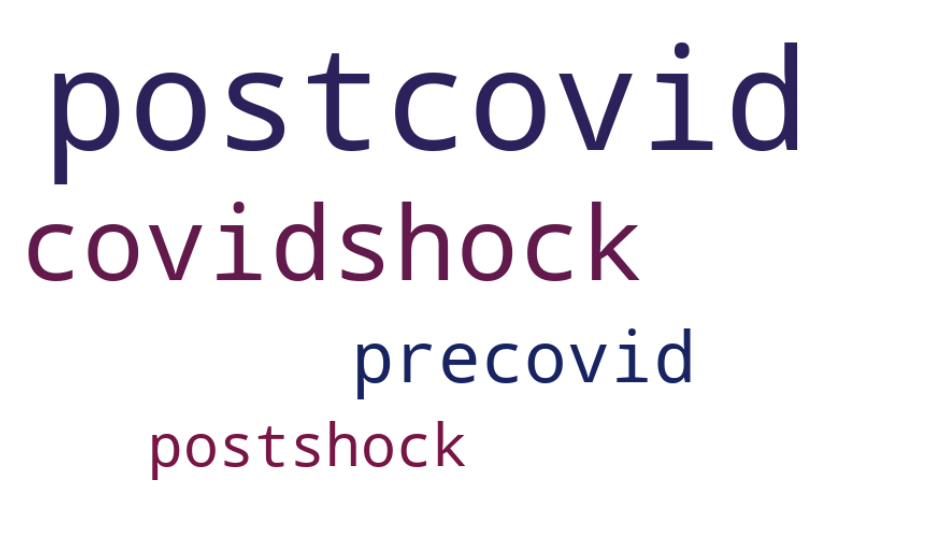

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['rq2.1_fase_citada'], width=853, height=506, max_words=5, colormap=cmap, background_color='WHITE')

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   #, preprocessing.remove_whitespace
                   #, preprocessing.remove_digits
                   #, preprocessing.remove_diacritics
                   #, preprocessing.remove_punctuation
                   #, preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['rq2.1_fase_citada_clean'] = hero.clean(df['rq2.1_fase_citada'], pipeline = custom_pipeline)

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['rq2.1_fase_citada_clean'])
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0   postcovid    131
1  covidshock     60
2    precovid     22
3   postshock     15

# RQ3 - TIPO DE IMPACTO

In [ ]:
# Join = merge = concatenar

df_cat3 = pd.merge(df_cat2,
                 df,
                 on ='Unnamed: 0')


In [ ]:
df_cat3[df_cat3['rq3_tipoImpactos']=='financas'].head(3)

Unnamed: 0 rq3_tipoImpactos  \
5             2         financas   
90           27         financas   
162          45         financas   

                                            all_tags_x     macro_dimensoes  \
5    relatório anual;financeiro;trabalho remoto;pro...  Capital financeiro   
90   cibersegurança;cloud;método ágil;internet das ...  Capital financeiro   
162  cloud;infraestrutura de dados;conectividade;fi...  Capital financeiro   

     level_0  index type_study       date  year  month  \
5          2      2       grey 2019-12-14  2019     12   
90        27     27       grey 2020-03-09  2020      3   
162       45     45       grey 2020-03-15  2020      3   

                                                header  \
5                      Sustainability Report - Infosys   
90   Cybersecurity Sector Faces Reckoning After Cor...   
162                             Covid-19 – fonicom.com   

                                                  link  on_20200511  \
5    https://www.infosys.com/sustainability/documen...          1.0   
90   https://www.bankinfosecurity.com/coronavirus-h...          1.0   
162                  https://www.fonicom.com/covid-19/          1.0   

                                               summary protocol  \
5    operational resilience of the Company. One of ...    https   
90   Mar 10, 2020 — Some firms could benefit even m...    https   
162  Mar 16, 2020 — Remote working – All of our ser...    https   

                       domain  \
5             www.infosys.com   
90   www.bankinfosecurity.com   
162           www.fonicom.com   

                                                  path query  fragment  \
5    /sustainability/documents/infosys-sustainabili...   NaN       NaN   
90   /coronavirus-hits-wall-street-cyber-survive-sl...   NaN       NaN   
162                                         /covid-19/   NaN       NaN   

                host_name      ip_address         Type AdditionalData  \
5             infosys.com     23.66.181.5  geolocation             {}   
90   bankinfosecurity.com   50.56.167.254  geolocation             {}   
162           fonicom.com  213.227.145.27  geolocation             {}   

    CountryCode    CountryName          State     City  Longitude   Latitude  \
5            US  United States       Illinois  Chicago -87.671249  41.848850   
90           US  United States          Texas   Dallas -96.814232  32.805431   
162          NL    Netherlands  North Holland   Diemen   4.940190  52.309052   

          IpAddress                                header_context_true  \
5       23.66.181.5                    Sustainability Report - Infosys   
90    50.56.167.254  Cybersecurity Sector Faces Reckoning After Cor...   
162  213.227.145.27                             Covid-19 – fonicom.com   

                                  summary_context_true  Asn edges  quarter  \
5    operational resilience of the Company. One of ...  NaN   NaN        4   
90   Mar 10, 2020 — Some firms could benefit even m...  NaN   NaN        1   
162  Mar 16, 2020 — Remote working – All of our ser...  NaN   NaN        1   

     day  day_of_week   shock_wave  page_rank  \
5     14            5    Pre-COVID          2   
90     9            0  COVID-shock          3   
162   15            6  COVID-shock          3   

                                     text_context_true  \
5    Sustainability Report - Infosys operational re...   
90   Cybersecurity Sector Faces Reckoning After Cor...   
162  Covid-19 – fonicom.com Mar 16, 2020 — Remote w...   

                            text_context_true_wo_punct  \
5    Sustainability Report  Infosys operational res...   
90   Cybersecurity Sector Faces Reckoning After Cor...   
162  Covid19 – fonicomcom Mar 16 2020 — Remote work...   

                text_context_true_wo_punct_clean_token  \
5    [sustainability, report, infosys, operational,...   
90   [cybersecurity, sector, faces, reckoning, coro...   
162  [fonicomcom, remote, working, s

In [ ]:
print(df_cat3.shape);
df_cat3.head()

(3708, 107)


Unnamed: 0                     rq3_tipoImpactos  \
0           0                transformacao digital   
1           1  analytics e inteligencia artificial   
2           1                       ciberseguranca   
3           1                         rastreamento   
4           1  analytics e inteligencia artificial   

                                          all_tags_x    macro_dimensoes  \
0                              transformação digital  Soluções digitais   
1  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   
2  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   
3  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   
4  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   

   level_0  index type_study       date  year  month  \
0        0      0       grey 2019-11-26  2019     11   
1        1      1       grey 2019-12-14  2019     12   
2        1      1       grey 2019-12-14  2019     12   
3        1      1       grey 2019-12-14  2019     12   
4        1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2  4 Ways Technology Is Helping to Fight the Coro...   
3  4 Ways Technology Is Helping to Fight the Coro...   
4  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.zsah.net/technology-fight-coronavi...          1.0   
3  https://www.zsah.net/technology-fight-coronavi...          1.0   
4  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  Connect organisations in need of development h...    https   
3  Connect organisations in need of development h...    https   
4  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   
2         www.zsah.net                     /technology-fight-coronavirus/   
3         www.zsah.net                     /technology-fight-coronavirus/   
4         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   
2   NaN       NaN         zsah.net    91217245111  geolocation             {}   
3   NaN       NaN         zsah.net    91217245111  geolocation             {}   
4   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   
2          GB  United Kingdom      England  City of Westminster  -0.116700   
3          GB  United Kingdom      England  City of Westminster  -0.116700   
4          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   
2    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   
3   

In [ ]:
df_cat3['rq3_tipoImpactos'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3703    False
3704    False
3705    False
3706    False
3707    False
Name: rq3_tipoImpactos, Length: 3708, dtype: bool

In [ ]:
df_cat3['macro_dimensoes'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3703    False
3704    False
3705    False
3706    False
3707    False
Name: macro_dimensoes, Length: 3708, dtype: bool

In [ ]:
#df_cat3['rq3_tipoImpactos'] = df_cat3['rq3_tipoImpactos'].replace(na,np.na)

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [#preprocessing.fillna
                   preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df_cat3['rq3_clean'] = hero.clean(df_cat3['rq3_tipoImpactos'], pipeline = custom_pipeline)

In [ ]:
# Removal of Stop Words

import nltk
nltk.download('stopwords')

stop = nltk.corpus.stopwords.words('portuguese')

df_cat3["rq3_clean"] = df_cat3["rq3_clean"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_cat3[['rq3_clean']].head()

[nltk_data] Downloading package stopwords to /home/eluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


rq3_clean
0              transformacao digital
1  analytics inteligencia artificial
2                     ciberseguranca
3                       rastreamento
4  analytics inteligencia artificial

In [ ]:
import texthero as hero
from texthero import stopwords
import pandas as pd
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(['de','boas', 'praticas']))
#s = pd.Series('Texthero is not only for the heroes www')

df_cat3['rq3_clean'] = hero.remove_stopwords(df_cat3['rq3_clean'], custom_stopwords)
df_cat3[['rq3_clean']].head()

rq3_clean
0              transformacao digital
1  analytics inteligencia artificial
2                     ciberseguranca
3                       rastreamento
4  analytics inteligencia artificial

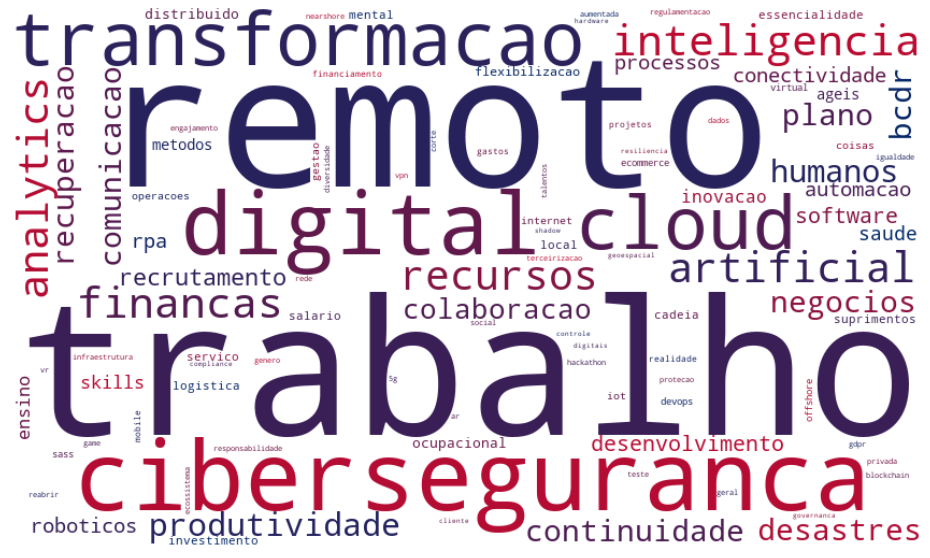

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df_cat3['rq3_clean'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
first = df_cat3[df_cat3['date']<'2020-05-04']

In [ ]:
first[['date']].tail()

date
975 2020-05-03
976 2020-05-03
977 2020-05-03
978 2020-05-03
979 2020-05-03

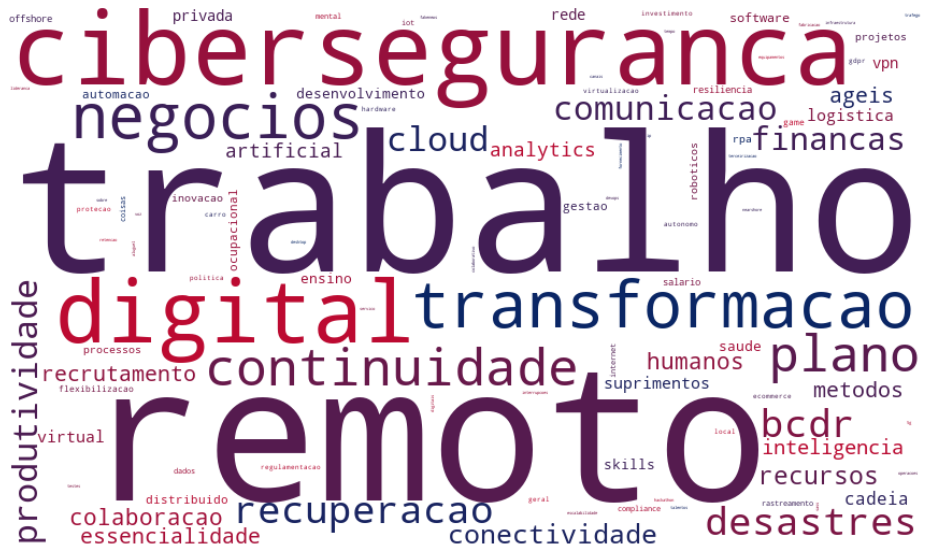

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(first['rq3_clean'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
macro4_solucoes_digitais = df_cat3[df_cat3['macro_dimensoes']=='Soluções digitais']

In [ ]:
macro4_solucoes_digitais.head()

Unnamed: 0                     rq3_tipoImpactos  \
0           0                transformacao digital   
1           1  analytics e inteligencia artificial   
2           1                       ciberseguranca   
3           1                         rastreamento   
4           1  analytics e inteligencia artificial   

                                          all_tags_x    macro_dimensoes  \
0                              transformação digital  Soluções digitais   
1  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   
2  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   
3  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   
4  inteligência artificial;cibersegurança;rastrea...  Soluções digitais   

   level_0  index type_study       date  year  month  \
0        0      0       grey 2019-11-26  2019     11   
1        1      1       grey 2019-12-14  2019     12   
2        1      1       grey 2019-12-14  2019     12   
3        1      1       grey 2019-12-14  2019     12   
4        1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2  4 Ways Technology Is Helping to Fight the Coro...   
3  4 Ways Technology Is Helping to Fight the Coro...   
4  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.zsah.net/technology-fight-coronavi...          1.0   
3  https://www.zsah.net/technology-fight-coronavi...          1.0   
4  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  Connect organisations in need of development h...    https   
3  Connect organisations in need of development h...    https   
4  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   
2         www.zsah.net                     /technology-fight-coronavirus/   
3         www.zsah.net                     /technology-fight-coronavirus/   
4         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   
2   NaN       NaN         zsah.net    91217245111  geolocation             {}   
3   NaN       NaN         zsah.net    91217245111  geolocation             {}   
4   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   
2          GB  United Kingdom      England  City of Westminster  -0.116700   
3          GB  United Kingdom      England  City of Westminster  -0.116700   
4          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   
2    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   
3   

In [ ]:
macro4_solucoes_digitais_otimista = df_cat3[(df_cat3['macro_dimensoes']=='Soluções digitais') &
                                  (df_cat3['conotação']=='otimista')]

In [ ]:
macro4_solucoes_digitais_pessimista = df_cat3[(df_cat3['macro_dimensoes']=='Soluções digitais') &
                                  (df_cat3['conotação']=='pessimista')]

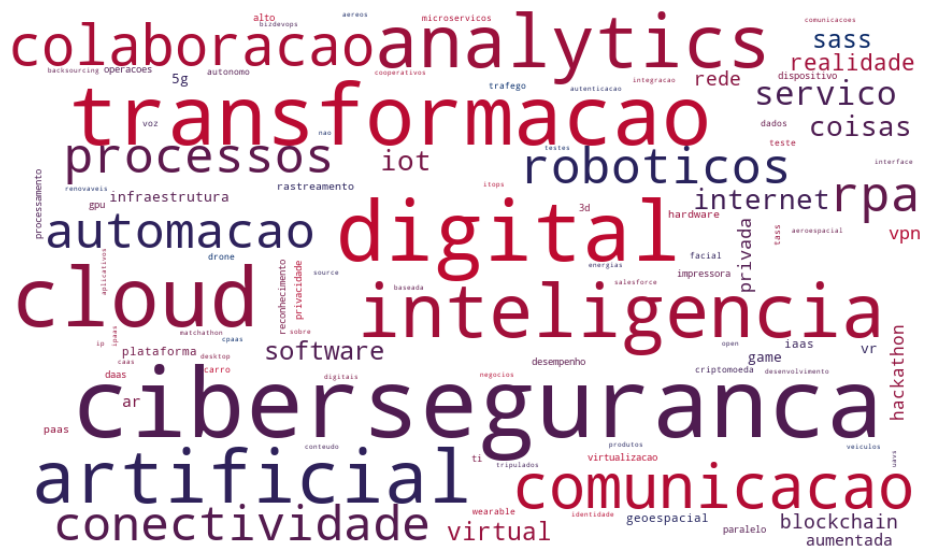

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(macro4_solucoes_digitais['rq3_clean'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

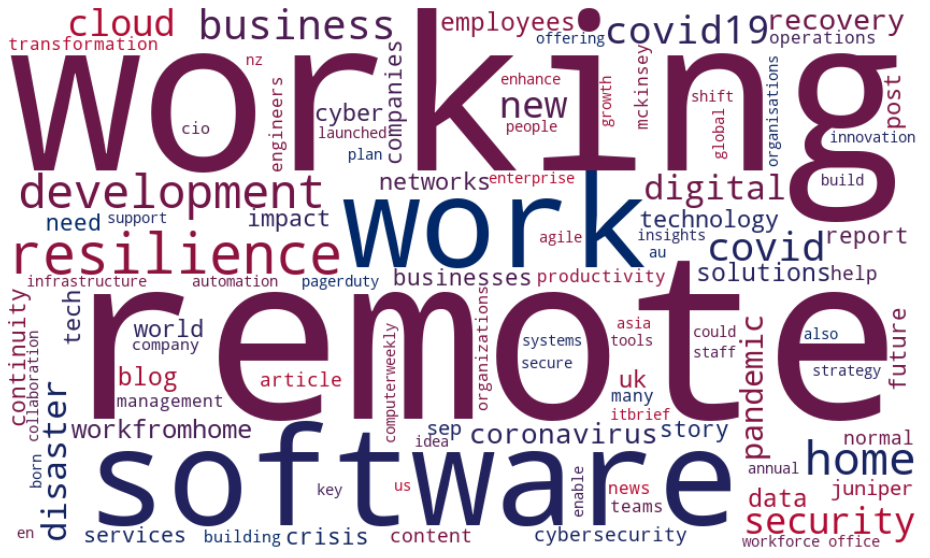

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(macro4_solucoes_digitais['text_context_true_wo_punct_clean'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

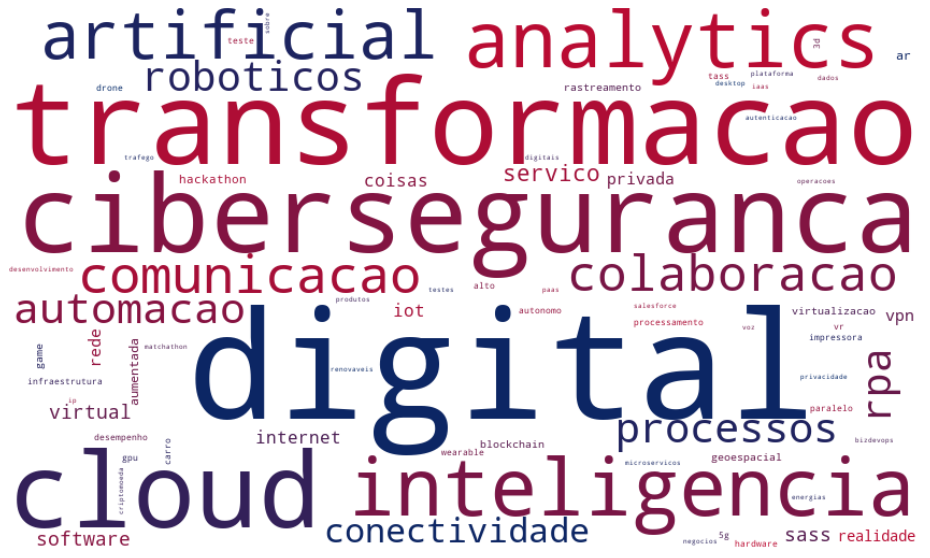

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(macro4_solucoes_digitais_otimista['rq3_clean'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

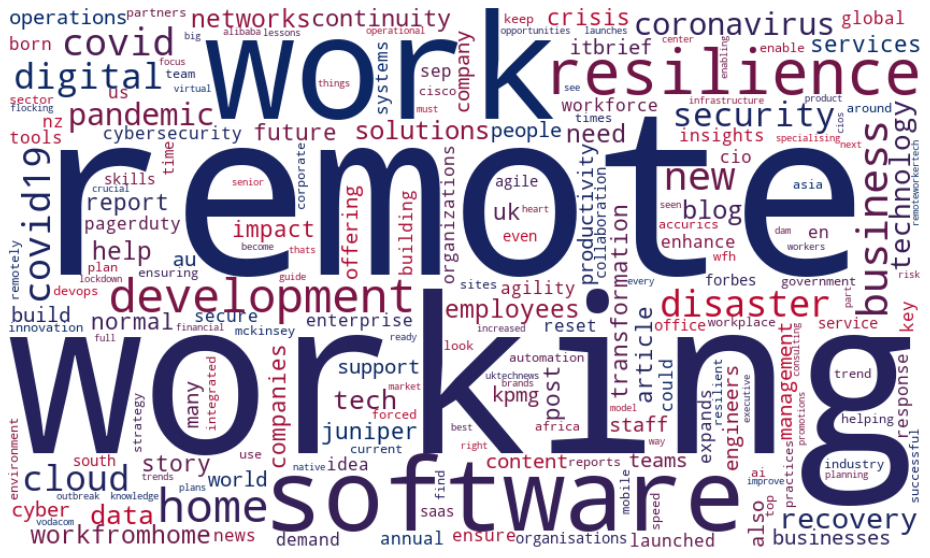

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(macro4_solucoes_digitais_otimista['text_context_true_wo_punct_clean'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

In [ ]:
macro4_solucoes_digitais_pessimista = df_cat3[(df_cat3['macro_dimensoes']=='Soluções digitais') &
                                  (df_cat3['conotação']=='pessimista')]

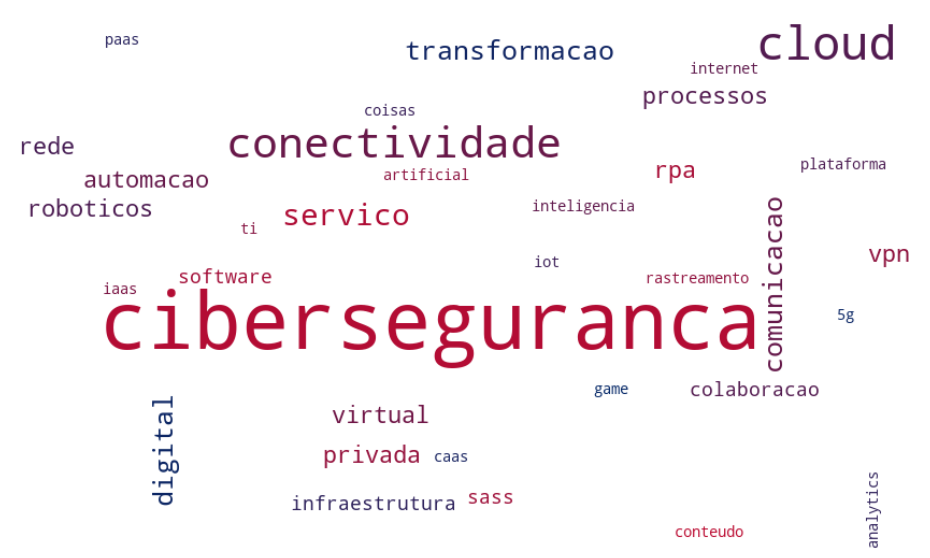

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(macro4_solucoes_digitais_pessimista['rq3_clean'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

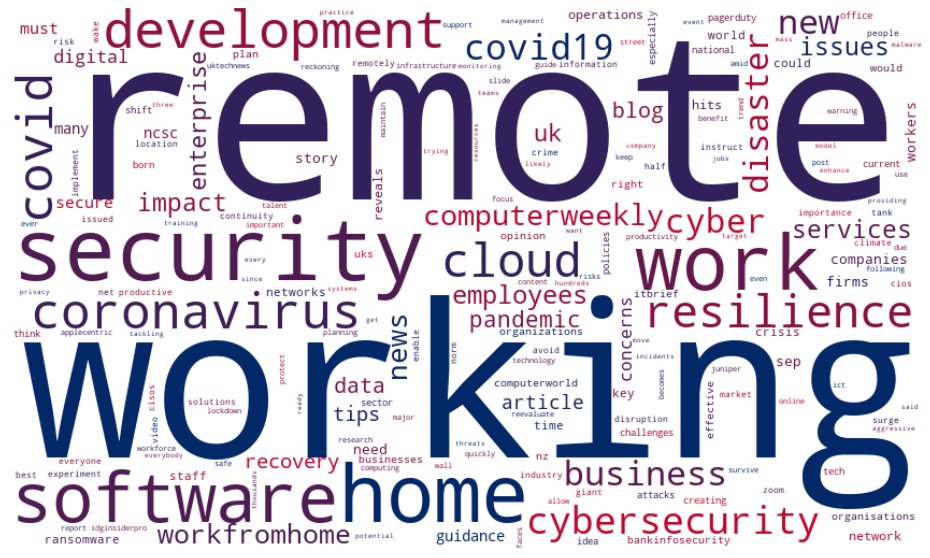

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(macro4_solucoes_digitais_pessimista['text_context_true_wo_punct_clean'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

In [ ]:
df_cat4 = df_cat3.drop_duplicates(subset=['date','header', 'rq1','text_context_true_wo_punct_clean','rq3'])
df_cat4[df_cat4['macro_dimensoes'].isnull()][['rq3','rq3_tipoImpactos']]

unicos = list(df_cat4[df_cat4['macro_dimensoes'].isnull()].sort_values(by=['rq3_tipoImpactos']).rq3_tipoImpactos.unique())
unicos

[]

In [ ]:
df_cat4.to_csv('/home/eluis/workspace/covid19impact/data/03_multivocal/step03_pnl_multivocal_cat4d_v1.csv', sep="|", encoding='UTF-8')

In [ ]:
df_cat4[df_cat4['Unnamed: 0'] == 3]

Unnamed: 0 rq3_tipoImpactos       all_tags_x          macro_dimensoes  \
9           3  trabalho remoto  trabalho remoto  Capital humano e social   

   level_0  index type_study       date  year  month  \
9        3      3       grey 2020-01-14  2020      1   

                                              header  \
9  Facing COVID-19: ThoughtWorks China's Story | ...   

                                                link  on_20200511  \
9  https://www.thoughtworks.com/china-covid-19-video          1.0   

                                             summary protocol  \
9  Embrace a modern approach to software developm...    https   

                 domain                   path query  fragment  \
9  www.thoughtworks.com  /china-covid-19-video   NaN       NaN   

          host_name    ip_address         Type AdditionalData CountryCode  \
9  thoughtworks.com  99.84.168.63  geolocation             {}          US   

     CountryName     State     City  Longitude  Latitude     IpAddress  \
9  United States  Illinois  Chicago -87.671249  41.84885  99.84.168.63   

                                 header_context_true  \
9  Facing COVID-19: ThoughtWorks China's Story | ...   

                                summary_context_true  Asn edges  quarter  day  \
9  Embrace a modern approach to software developm...  NaN   NaN        1   14   

   day_of_week   shock_wave  page_rank  \
9            1  COVID-shock          1   

                                   text_context_true  \
9  Facing COVID-19: ThoughtWorks China's Story | ...   

                          text_context_true_wo_punct  \
9  Facing COVID19 ThoughtWorks Chinas Story  Thou...   

              text_context_true_wo_punct_clean_token  \
9  [facing, thoughtworks, chinas, story, thoughtw...   

               text_context_true_wo_punct_clean_stem  \
9  face covid19 thoughtwork china stori thoughtwo...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
9  face covid19 thoughtworks chinas story thought...          38         321   

   avg_word  stopwords  hastags  \
9       1.0         19        0   

                                                 key  Happy  Angry  Surprise  \
9  2020-01-14 00:00:00 ; Facing COVID-19: Thought...    0.0    0.1       0.2   

   Sad  Fear dominant_emotion  weekday  questao1-persona questao2-persona  \
9  0.2   0.5             Fear  Tuesday               0.0              NaN   

   questao1-disaster_resilience  \
9                           0.0   

                    text_context_true_wo_punct_clean  status1-selecao  \
9  facing covid19 thoughtworks chinas story thoug...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
9                   0                        1             1  1.0  0.0   

  rq2.1_fase_citada              rq3 format font_type    tier  \
9               NaN  trabalho remoto    web     video  tier-3   

        all_tags_y conotação tipo_porte    setor  STRINGS  covid  coronavirus  \
9  trabalho remoto  otimista    empresa  privado      5.0      1            0   

   covid impact  software engineers  software development  \
9             0                   0                     1   

   disaster informatics  productivity  work from home  remote working  \
9                     0             0               1               1   

   disaster  resilience                                         link2  \
9         0           1  https www thoughtworks com china covid video   

  rq2.1_fase_citada_clean        rq3_clean tipo_porte_clean normalised_date  \
9                          trabalho remoto          empresa      2020-01-14   

   keyword_match author_keywords index_keywords base authors  \
9           True             NaN            NaN  NaN     NaN   

  publication_title endereco observação  publication_year document_identifier  \
9               NaN      NaN        NaN               NaN                 NaN   

  location geometry  Altitu

In [ ]:
n = df_cat4.shape[0]
n

1129

In [ ]:
# Explore classes result
df_cat4['macro_dimensoes'].value_counts(dropna = False).reset_index()

index  macro_dimensoes
0  Capital humano e social              503
1        Soluções digitais              388
2      Capital intelectual              178
3       Capital financeiro               60

In [ ]:
sumary = df_cat4.groupby(['conotação','macro_dimensoes', 'type_study']).agg(
    counts = pd.NamedAgg(column='macro_dimensoes', aggfunc='count'),
).reset_index()

sumary['%'] = ( sumary['counts'] / n ) * 100
sumary = sumary.sort_values(by=['%'], ascending=False)
sumary

conotação          macro_dimensoes type_study  counts          %
8     otimista  Capital humano e social       grey     296  26.217892
11    otimista        Soluções digitais       grey     166  14.703277
1        mista  Capital humano e social       grey     154  13.640390
5        mista        Soluções digitais       grey     145  12.843224
10    otimista      Capital intelectual       grey      94   8.325952
3        mista      Capital intelectual       grey      73   6.465899
16  pessimista        Soluções digitais       grey      71   6.288751
14  pessimista  Capital humano e social       grey      49   4.340124
7     otimista       Capital financeiro       grey      24   2.125775
0        mista       Capital financeiro       grey      22   1.948627
13  pessimista       Capital financeiro       grey      14   1.240035
15  pessimista      Capital intelectual       grey       7   0.620018
6        mista        Soluções digitais      white       4   0.354296
4        mista      Capital intelectual      white       4   0.354296
2        mista  Capital humano e social      white       3   0.265722
12    otimista        Soluções digitais      white       2   0.177148
9     otimista  Capital humano e social      white       1   0.088574

In [ ]:
df = df_cat4

In [ ]:
# Explore classes result
df_diagnostic_sumary_total = df['macro_dimensoes'].value_counts(dropna = False).reset_index()
df_diagnostic_sumary_total = df_diagnostic_sumary_total.rename(columns={
    'index':'macro_dimensoes',
    'macro_dimensoes':'publicacoes'})

df_diagnostic_sumary_total.loc['Total',:] = df_diagnostic_sumary_total.sum(axis=0)
df_diagnostic_sumary_total = df_diagnostic_sumary_total.replace('Capital humano e socialSoluções digitaisCapital intelectualCapital financeiro','')
df_diagnostic_sumary_total['%'] = ( df_diagnostic_sumary_total['publicacoes'] / n ) * 100
df_diagnostic_sumary_total = df_diagnostic_sumary_total.sort_values(by=['%'], ascending=True)
df_diagnostic_sumary_total

macro_dimensoes  publicacoes           %
3           Capital financeiro         60.0    5.314438
2          Capital intelectual        178.0   15.766165
1            Soluções digitais        388.0   34.366696
0      Capital humano e social        503.0   44.552702
Total                                1129.0  100.000000

In [ ]:
import plotly.express as px
fig = px.bar(df_diagnostic_sumary_total.drop(['Total'], axis=0), x="macro_dimensoes", y="publicacoes", text="publicacoes",
             color = "macro_dimensoes", 
             height=500)

#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

In [ ]:
# Explore classes result
first['macro_dimensoes'].value_counts(dropna = False).reset_index()

index  macro_dimensoes
0        Soluções digitais              351
1  Capital humano e social              299
2      Capital intelectual              286
3       Capital financeiro               44

In [ ]:
# Explore classes result
df_diagnostic_sumary_total = first['macro_dimensoes'].value_counts(dropna = False).reset_index()
df_diagnostic_sumary_total = df_diagnostic_sumary_total.rename(columns={
    'index':'macro_dimensoes',
    'macro_dimensoes':'publicacoes'})

df_diagnostic_sumary_total.loc['Total',:] = df_diagnostic_sumary_total.sum(axis=0)
df_diagnostic_sumary_total = df_diagnostic_sumary_total.replace('Capital humano e socialSoluções digitaisCapital intelectualCapital financeiro','')
df_diagnostic_sumary_total['%'] = ( df_diagnostic_sumary_total['publicacoes'] / n ) * 100
df_diagnostic_sumary_total = df_diagnostic_sumary_total.sort_values(by=['%'], ascending=True)
df_diagnostic_sumary_total

macro_dimensoes  publicacoes  \
3                                     Capital financeiro         44.0   
2                                    Capital intelectual        286.0   
1                                Capital humano e social        299.0   
0                                      Soluções digitais        351.0   
Total  Soluções digitaisCapital humano e socialCapita...        980.0   

               %  
3       3.897254  
2      25.332152  
1      26.483614  
0      31.089460  
Total  86.802480

In [ ]:
import plotly.express as px
fig = px.bar(df_diagnostic_sumary_total.drop(['Total'], axis=0), x="macro_dimensoes", y="publicacoes", text="publicacoes",
             color = "macro_dimensoes", 
             height=500)

#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

In [ ]:
sumary = df_cat4.groupby(['shock_wave','conotação','macro_dimensoes', 'type_study']).agg(
    counts = pd.NamedAgg(column='macro_dimensoes', aggfunc='count'),
).reset_index()

sumary['%'] = ( sumary['counts'] / n ) * 100
sumary = sumary.sort_values(by=['shock_wave', '%'], ascending=False)
sumary

shock_wave   conotação          macro_dimensoes type_study  counts  \
31    Pre-COVID    otimista        Soluções digitais       grey       2   
30    Pre-COVID    otimista       Capital financeiro       grey       1   
20   Post-shock       mista        Soluções digitais       grey      33   
16   Post-shock       mista  Capital humano e social       grey      17   
18   Post-shock       mista      Capital intelectual       grey       8   
23   Post-shock    otimista  Capital humano e social       grey       8   
26   Post-shock    otimista        Soluções digitais       grey       6   
15   Post-shock       mista       Capital financeiro       grey       5   
29   Post-shock  pessimista        Soluções digitais       grey       4   
21   Post-shock       mista        Soluções digitais      white       3   
22   Post-shock    otimista       Capital financeiro       grey       3   
25   Post-shock    otimista      Capital intelectual       grey       3   
19   Post-shock       mista      Capital intelectual      white       2   
27   Post-shock    otimista        Soluções digitais      white       2   
17   Post-shock       mista  Capital humano e social      white       1   
24   Post-shock    otimista  Capital humano e social      white       1   
28   Post-shock  pessimista  Capital humano e social       grey       1   
8   COVID-shock    otimista  Capital humano e social       grey     288   
10  COVID-shock    otimista        Soluções digitais       grey     158   
1   COVID-shock       mista  Capital humano e social       grey     137   
5   COVID-shock       mista        Soluções digitais       grey     112   
9   COVID-shock    otimista      Capital intelectual       grey      91   
14  COVID-shock  pessimista        Soluções digitais       grey      67   
3   COVID-shock       mista      Capital intelectual       grey      65   
12  COVID-shock  pessimista  Capital humano e social       grey      48   
7   COVID-shock    otimista       Capital financeiro       grey      20   
0   COVID-shock       mista       Capital financeiro       grey      17   
11  COVID-shock  pessimista       Capital financeiro       grey      14   
13  COVID-shock  pessimista      Capital intelectual       grey       7   
2   COVID-shock       mista  Capital humano e social      white       2   
4   COVID-shock       mista      Capital intelectual      white       2   
6   COVID-shock       mista        Soluções digitais      white       1   

            %  
31   0.177148  
30   0.088574  
20   2.922941  
16   1.505757  
18   0.708592  
23   0.708592  
26   0.531444  
15   0.442870  
29   0.354296  
21   0.265722  
22   0.265722  
25   0.265722  
19   0.177148  
27   0.177148  
17   0.088574  
24   0.088574  
28   0.088574  
8   25.509300  
10  13.994686  
1   12.134632  
5    9.920283  
9    8.060230  
14   5.934455  
3    5.757307  
12   4.251550  
7    1.771479  
0    1.505757  
11   1.240035  
13   0.620018  
2    0.177148  
4    0.177148  
6    0.088574

In [ ]:
sumary.to_csv('/home/eluis/workspace/covid19impact/data/03_multivocal/sumary_4d_ondas.csv', sep=";", encoding='UTF-8')

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
grey = df_cat3.loc[df_cat3['type_study']=='grey']
white = df_cat3.loc[df_cat3['type_study']=='white']
multivocal = df_cat3

In [ ]:
white.shape

(95, 107)

In [ ]:
common_words_grey = get_top_n_words(grey['rq3'], 10)
common_words_white = get_top_n_words(white['rq3'], 10)
common_words_multivocal = get_top_n_words(multivocal['rq3'], 10)

In [ ]:
common_words_grey

[('trabalho', 2553),
 ('remoto', 2473),
 ('cibersegurança', 1301),
 ('digital', 1236),
 ('transformação', 1068),
 ('cloud', 1012),
 ('produtividade', 752),
 ('financeiro', 718),
 ('comunicação', 663),
 ('colaboração', 661)]

In [ ]:
common_words_grey_df = pd.DataFrame(common_words_grey, columns = ['keywords' , 'count'])
common_words_grey_df['type_study'] = 'grey'
common_words_white_df = pd.DataFrame(common_words_white, columns = ['keywords' , 'count'])
common_words_white_df['type_study'] = 'white'
common_words_multivocal_df = pd.DataFrame(common_words_multivocal, columns = ['keywords' , 'count'])
common_words_multivocal_df['type_study'] = 'multivocal'

In [ ]:
common_words_white_df

keywords  count type_study
0  desenvolvimento     60      white
1           remoto     51      white
2     inteligência     48      white
3       artificial     38      white
4              iot     36      white
5         trabalho     36      white
6         robótica     36      white
7           mobile     32      white
8               5g     29      white
9   cibersegurança     28      white

In [ ]:
common_words_grey_df

keywords  count type_study
0        trabalho   2553       grey
1          remoto   2473       grey
2  cibersegurança   1301       grey
3         digital   1236       grey
4   transformação   1068       grey
5           cloud   1012       grey
6   produtividade    752       grey
7      financeiro    718       grey
8     comunicação    663       grey
9     colaboração    661       grey

In [ ]:
common_words_multivocal_df

keywords  count  type_study
0        trabalho   2589  multivocal
1          remoto   2524  multivocal
2  cibersegurança   1329  multivocal
3         digital   1252  multivocal
4   transformação   1084  multivocal
5           cloud   1012  multivocal
6   produtividade    769  multivocal
7      financeiro    744  multivocal
8     comunicação    687  multivocal
9     colaboração    682  multivocal

In [ ]:
df2 = pd.concat([common_words_grey_df,common_words_white_df,common_words_multivocal_df])
df2

keywords  count  type_study
0         trabalho   2553        grey
1           remoto   2473        grey
2   cibersegurança   1301        grey
3          digital   1236        grey
4    transformação   1068        grey
5            cloud   1012        grey
6    produtividade    752        grey
7       financeiro    718        grey
8      comunicação    663        grey
9      colaboração    661        grey
0  desenvolvimento     60       white
1           remoto     51       white
2     inteligência     48       white
3       artificial     38       white
4              iot     36       white
5         trabalho     36       white
6         robótica     36       white
7           mobile     32       white
8               5g     29       white
9   cibersegurança     28       white
0         trabalho   2589  multivocal
1           remoto   2524  multivocal
2   cibersegurança   1329  multivocal
3          digital   1252  multivocal
4    transformação   1084  multivocal
5            cloud   1012  multivocal
6    produtividade    769  multivocal
7       financeiro    744  multivocal
8      comunicação    687  multivocal
9      colaboração    682  multivocal

In [ ]:
pivot = pd.pivot_table(df2, index=['type_study', 'keywords']).style
#pivot = pivot.reset_index()
pivot

In [ ]:
df2.head(2)

keywords  count type_study
0  trabalho   2553       grey
1    remoto   2473       grey

In [ ]:
import plotly.express as px
fig = px.bar(df2, x="keywords", y="count",
             color='type_study', barmode='group',
             height=400)
#fig.update_layout(title=go.layout.Title(text="Top 10 keywords in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

In [ ]:
# get  bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_bigram(grey['rq3_clean'], 20)
df3_white = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_white

bigram  count
0               trabalho remoto    685
1         transformacao digital    248
2       inteligencia artificial    186
3        analytics inteligencia    185
4              recursos humanos    151
5         continuidade negocios    141
6            plano continuidade    134
7          negocios recuperacao    134
8         recuperacao desastres    134
9                desastres bcdr    134
10          automacao processos     87
11          processos roboticos     87
12                roboticos rpa     87
13         humanos recrutamento     87
14               ensino digital     72
15               digital skills     72
16                metodos ageis     50
17                humanos saude     46
18            saude ocupacional     46
19  desenvolvimento distribuido     45

In [ ]:
common_words = get_top_n_bigram(grey['rq3_clean'], 20)
df3_grey = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_grey

bigram  count
0               trabalho remoto    685
1         transformacao digital    248
2       inteligencia artificial    186
3        analytics inteligencia    185
4              recursos humanos    151
5         continuidade negocios    141
6            plano continuidade    134
7          negocios recuperacao    134
8         recuperacao desastres    134
9                desastres bcdr    134
10          automacao processos     87
11          processos roboticos     87
12                roboticos rpa     87
13         humanos recrutamento     87
14               ensino digital     72
15               digital skills     72
16                metodos ageis     50
17                humanos saude     46
18            saude ocupacional     46
19  desenvolvimento distribuido     45

In [ ]:
common_words = get_top_n_bigram(white['rq3_clean'], 20)
df3_white = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_white

bigram  count
0   desenvolvimento software      9
1     analytics inteligencia      8
2    inteligencia artificial      8
3            trabalho remoto      5
4        automacao processos      5
5        processos roboticos      5
6              roboticos rpa      5
7            internet coisas      4
8                 coisas iot      4
9            software mobile      4
10            ensino digital      3
11            digital skills      3
12     transformacao digital      2
13     recursos recrutamento      2
14      recrutamento salario      2
15        plano continuidade      2
16     continuidade negocios      2
17      negocios recuperacao      2
18     recuperacao desastres      2
19            desastres bcdr      2

In [ ]:
common_words = get_top_n_bigram(multivocal['rq3_clean'], 20)
df3_multivocal = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_multivocal

bigram  count
0               trabalho remoto    690
1         transformacao digital    250
2       inteligencia artificial    194
3        analytics inteligencia    193
4              recursos humanos    151
5         continuidade negocios    143
6            plano continuidade    136
7          negocios recuperacao    136
8         recuperacao desastres    136
9                desastres bcdr    136
10          automacao processos     92
11          processos roboticos     92
12                roboticos rpa     92
13         humanos recrutamento     87
14               ensino digital     75
15               digital skills     75
16                metodos ageis     51
17  desenvolvimento distribuido     47
18         distribuido software     47
19                humanos saude     46

In [ ]:
#get trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
common_words = get_top_n_trigram(grey['rq3_clean'], 20)
df4_grey = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4_grey

trigram  count
0      analytics inteligencia artificial    185
1            plano continuidade negocios    134
2      continuidade negocios recuperacao    134
3         negocios recuperacao desastres    134
4             recuperacao desastres bcdr    134
5          automacao processos roboticos     87
6                processos roboticos rpa     87
7          recursos humanos recrutamento     87
8                  ensino digital skills     72
9                 recursos humanos saude     46
10             humanos saude ocupacional     46
11  desenvolvimento distribuido software     45
12        trabalho remoto flexibilizacao     41
13               saude ocupacional saude     36
14              ocupacional saude mental     36
15          logistica cadeia suprimentos     31
16         recursos recrutamento salario     27
17                   internet coisas iot     20
18      desenvolvimento operacoes devops     19
19                cloud software servico     18

In [ ]:
common_words = get_top_n_trigram(white['rq3_clean'], 20)
df4_white = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4_white

trigram  count
0      analytics inteligencia artificial      8
1          automacao processos roboticos      5
2                processos roboticos rpa      5
3                    internet coisas iot      4
4        desenvolvimento software mobile      4
5                  ensino digital skills      3
6          recursos recrutamento salario      2
7            plano continuidade negocios      2
8      continuidade negocios recuperacao      2
9         negocios recuperacao desastres      2
10            recuperacao desastres bcdr      2
11                 digital skills remoto      2
12  desenvolvimento distribuido software      2
13        desenvolvimento software teste      2
14     desenvolvimento software frontend      2
15                 software frontend web      2
16         regulamentacao geral protecao      2
17                  geral protecao dados      2
18                   protecao dados gdpr      2
19                   veiculos aereos nao      1

In [ ]:
common_words = get_top_n_trigram(multivocal['rq3_clean'], 20)
df4_multivocal = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4_multivocal

trigram  count
0      analytics inteligencia artificial    193
1            plano continuidade negocios    136
2      continuidade negocios recuperacao    136
3         negocios recuperacao desastres    136
4             recuperacao desastres bcdr    136
5          automacao processos roboticos     92
6                processos roboticos rpa     92
7          recursos humanos recrutamento     87
8                  ensino digital skills     75
9   desenvolvimento distribuido software     47
10                recursos humanos saude     46
11             humanos saude ocupacional     46
12        trabalho remoto flexibilizacao     41
13               saude ocupacional saude     36
14              ocupacional saude mental     36
15          logistica cadeia suprimentos     31
16         recursos recrutamento salario     29
17                   internet coisas iot     24
18      desenvolvimento operacoes devops     19
19                cloud software servico     19

In [ ]:
fig = go.Figure([go.Bar(x=df4_multivocal['trigram'], y=df4_multivocal['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 trigrams in the question text"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

## CONOTACAO

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(white['conotação'])
df2_white = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_white

keywords  count
0     mista     76
1  otimista     19

In [ ]:
common_words = get_top_n_words(grey['conotação'])
df2_grey = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_grey

keywords  count
0    otimista   1879
1       mista   1437
2  pessimista    297

In [ ]:
common_words = get_top_n_words(multivocal['conotação'])
df2_multivocal = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_multivocal

keywords  count
0    otimista   1898
1       mista   1513
2  pessimista    297

## TIPO-PORTE

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
white[['tipo_porte_clean']]

tipo_porte_clean
3613          empresa
3614          empresa
3615          empresa
3616          empresa
3617          empresa
3618          empresa
3619          empresa
3620              NaN
3621              NaN
3622              NaN
3623              NaN
3624              NaN
3625              NaN
3626              NaN
3627              NaN
3628              NaN
3629              NaN
3630              NaN
3631              NaN
3632     universidade
3633     universidade
3634     universidade
3635     universidade
3636     universidade
3637              NaN
3638              NaN
3639              NaN
3640              NaN
3641              NaN
3642              NaN
3643              NaN
3644              NaN
3645  startup empresa
3646  startup empresa
3647  startup empresa
3648  startup empresa
3649  startup empresa
3650  startup empresa
3651  startup empresa
3652  startup empresa
3653  startup empresa
3654  startup empresa
3655  startup empresa
3656              NaN
3657              NaN
3658              NaN
3659              NaN
3660              NaN
3661              NaN
3662              NaN
3663              NaN
3664              NaN
3665              NaN
3666              NaN
3667              NaN
3668              NaN
3669              NaN
3670              NaN
3671              NaN
3672  governo empresa
3673  governo empresa
3674  governo empresa
3675              NaN
3676              NaN
3677              NaN
3678              NaN
3679              NaN
3680              NaN
3681              NaN
3682              NaN
3683              NaN
3684              NaN
3685              NaN
3686              NaN
3687              NaN
3688              NaN
3689          empresa
3690          empresa
3691          empresa
3692          empresa
3693          empresa
3694     universidade
3695     universidade
3696              NaN
3697              NaN
3698              NaN
3699              NaN
3700              NaN
3701              NaN
3702              NaN
3703              NaN
3704              NaN
3705              NaN
3706              NaN
3707              NaN

In [ ]:
white['tipo_porte_clean'] = white['tipo_porte_clean'].replace(np.nan, 'NA')

<ipython-input-163-790a549e43e4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
common_words = get_top_n_words(white['tipo_porte_clean'])
df2_white = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_white

keywords  count
0            na     62
1       empresa     26
2       startup     11
3  universidade      7
4       governo      3

In [ ]:
common_words = get_top_n_words(grey['tipo_porte_clean'])
df2_grey = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_grey

keywords  count
0       empresa   3464
1       governo    115
2           pme    113
3       startup     85
4  universidade     32

In [ ]:
multivocal['tipo_porte_clean'] = multivocal['tipo_porte_clean'].replace(np.nan, 'NA')

In [ ]:
common_words = get_top_n_words(multivocal['tipo_porte_clean'])
df2_multivocal = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_multivocal

keywords  count
0       empresa   3490
1       governo    118
2           pme    113
3       startup     96
4            na     62
5  universidade     39

## SETOR

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
white['setor'] = white['setor'].replace(np.nan, 'NA')

<ipython-input-169-18ba8d2990b1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
common_words = get_top_n_words(white['setor'])
df2_white = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_white

keywords  count
0         misto     39
1            na     31
2       privado     23
3  universidade      2

In [ ]:
common_words = get_top_n_words(grey['setor'])
df2_grey = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_grey

keywords  count
0  privado   3496
1  publico     73
2    misto     44

In [ ]:
multivocal['setor'] = multivocal['setor'].replace(np.nan, 'NA')

In [ ]:
common_words = get_top_n_words(multivocal['setor'])
df2_multivocal = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_multivocal

keywords  count
0       privado   3519
1         misto     83
2       publico     73
3            na     31
4  universidade      2

# Output

In [ ]:
path = '/home/eluis/workspace/covid19impact/data/03_multivocal/'

In [ ]:
df.to_csv('step03_pnl_multivocal_cat4d_v1', sep="|", encoding='UTF-8')